# HW2

In [1]:
require(data.table)
require(ggplot2)
require(repr)
require(rpart)
require(rattle)
require(TSrepr)
require(zoo)
require(genlasso)

Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: repr
Loading required package: rpart
Loading required package: rattle
Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Loading required package: bitops
Warning message:
"package 'bitops' was built under R version 3.6.3"Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: TSrepr
Warning message:
"package 'TSrepr' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading re

## Reading Data and Manipulation

In [3]:
traindata=fread("c:/users/mirac/HW2/CBF/CBF_TRAIN.txt")
 traindatamatrix=as.matrix(traindata)
trainclass=traindatamatrix[,1]
traindatamatrix=traindatamatrix[,-1]
traindata=traindata[,-1]
traindata[,id:=1:.N]
traindatalong=melt(traindata,id.vars='id')
traindatalong[,time:=as.numeric(gsub("\\D", "", variable))-1]
traindatalong=traindatalong[,list(id,time,value)]
traindatalong=traindatalong[order(id,time)]
par(mfrow=c(2,2))
series_id=unique(traindatalong$id)


#### This function returns MSE values for 1dlasso representation. By using trendfilter() and cv.trendfilter() functions, I obtained lambda values to minimize cross-validation error.

In [4]:
lambdafunc=function(x){
seri_id=unique(x[1,1])
  y=x$value
     y=as.matrix(y)
     a=trendfilter(y,ord = 0)
     b=cv.trendfilter(a,k=10,mode = "lambda")
plot(a,lambda=b$lambda.min,main=seri_id)
     c=predict.genlasso(a,lambda = b$lambda.min)
    d=as.data.table(c$fit)
 k=as.data.table(y)
 u=cbind(d,k)
u[,error:=u[,1]-u[,2]]
u[,mse:=error^2]
z=sum(u[,mse])
z=z/nrow(u)
    return(z)
}

#### Representations using lambda.min values

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


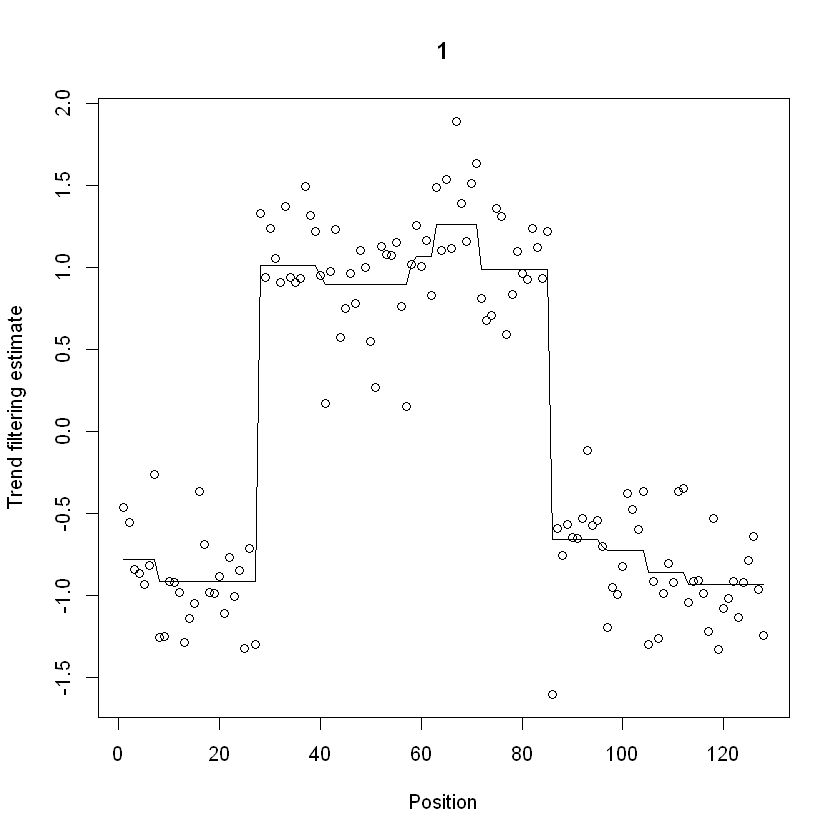

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


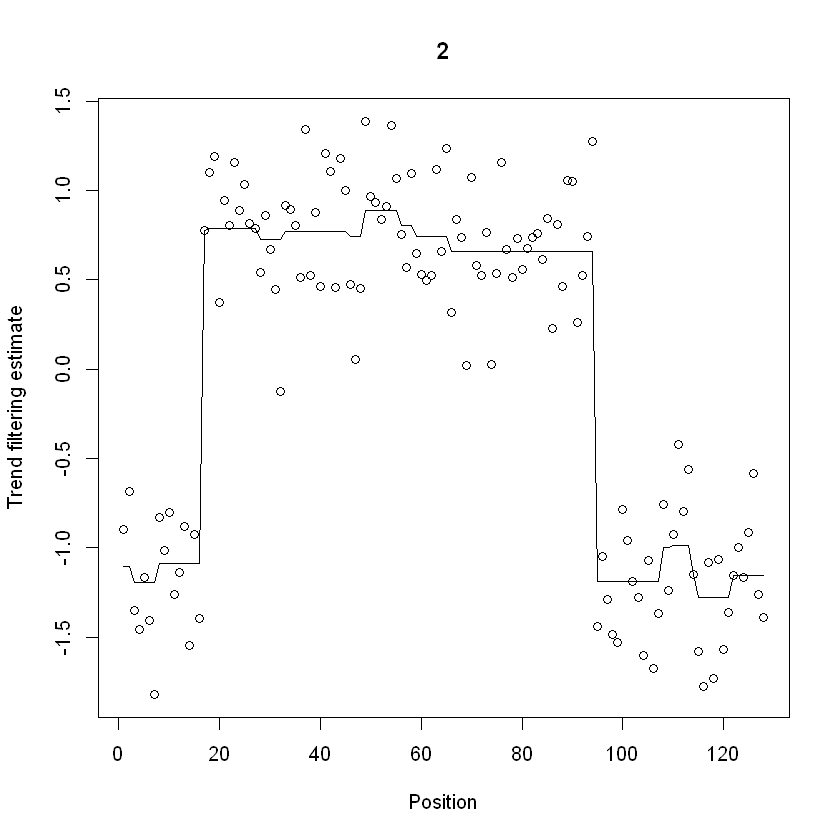

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


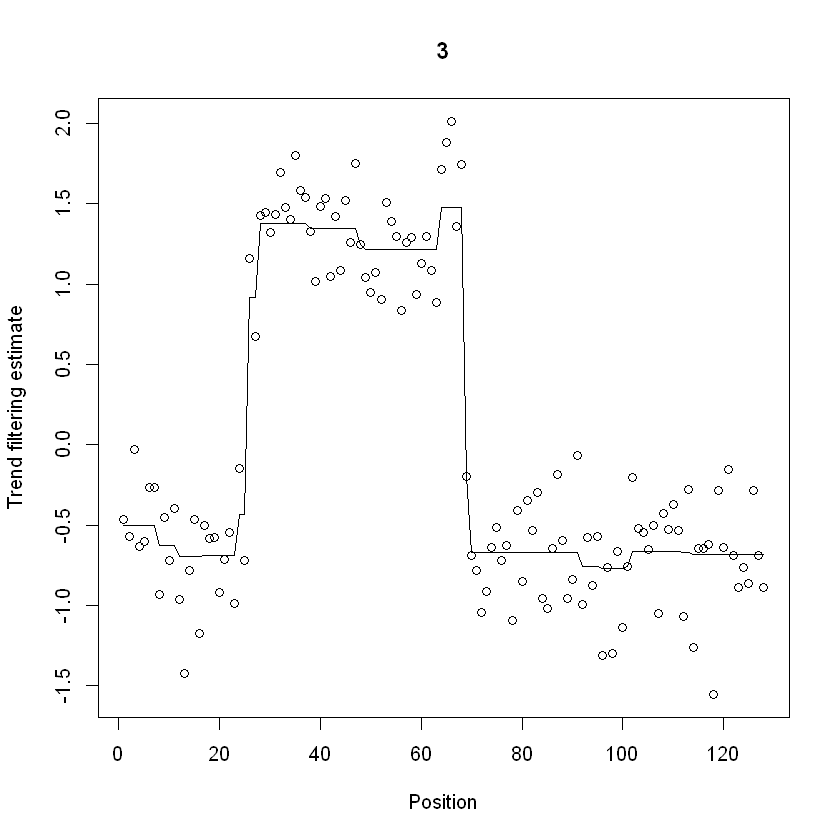

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


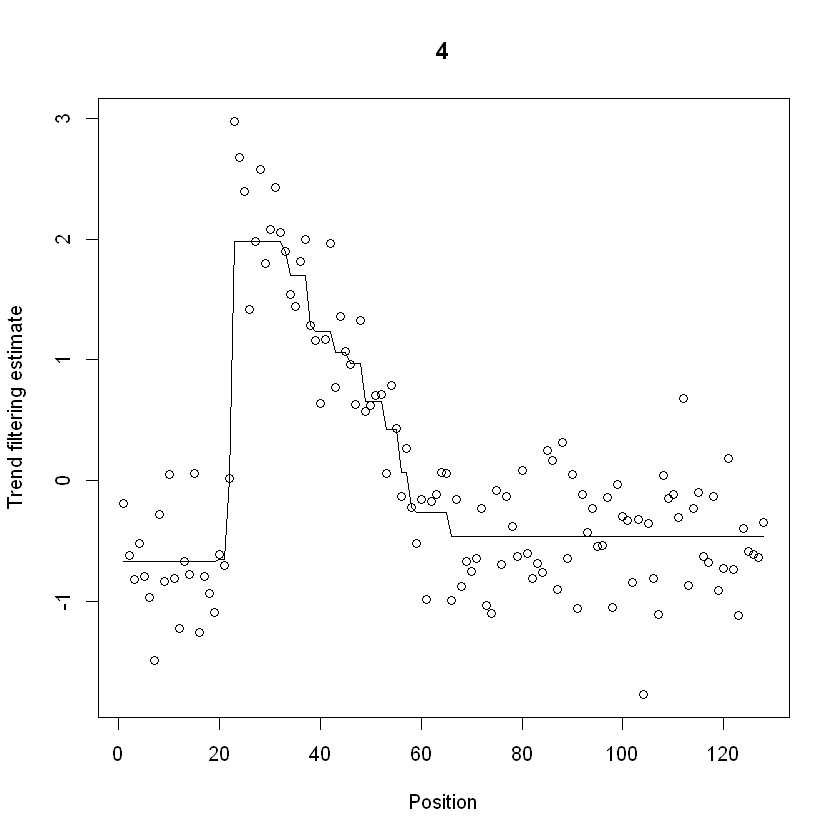

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


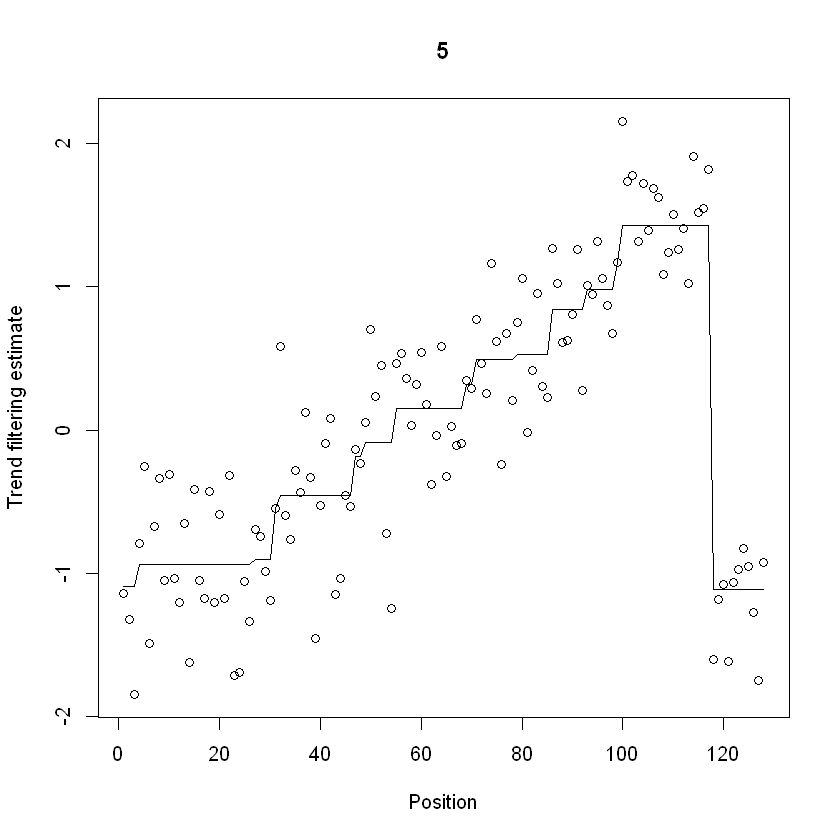

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


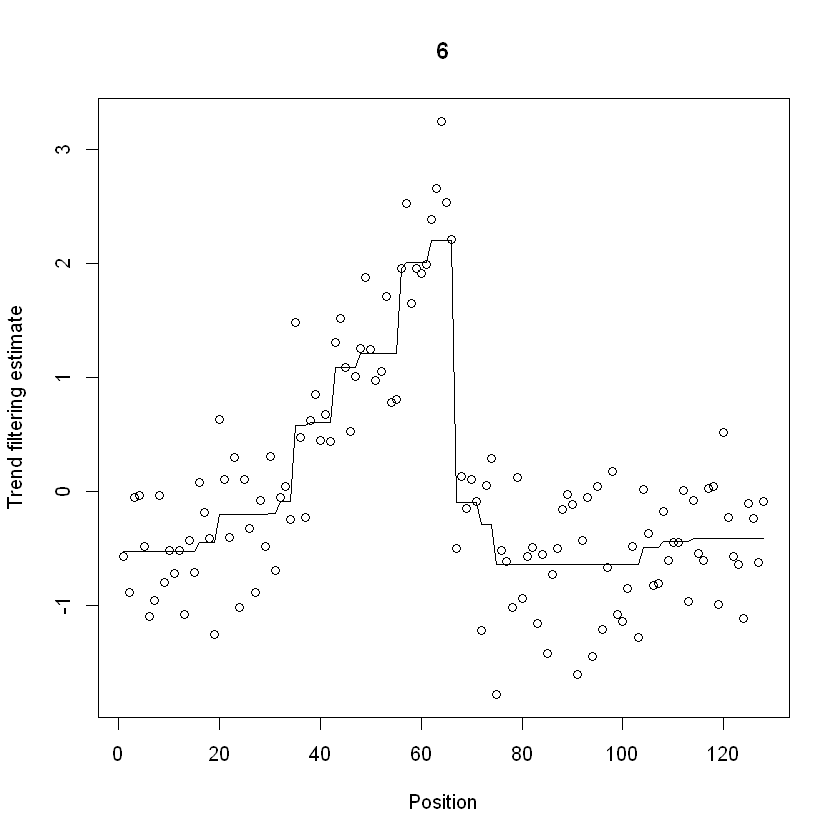

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


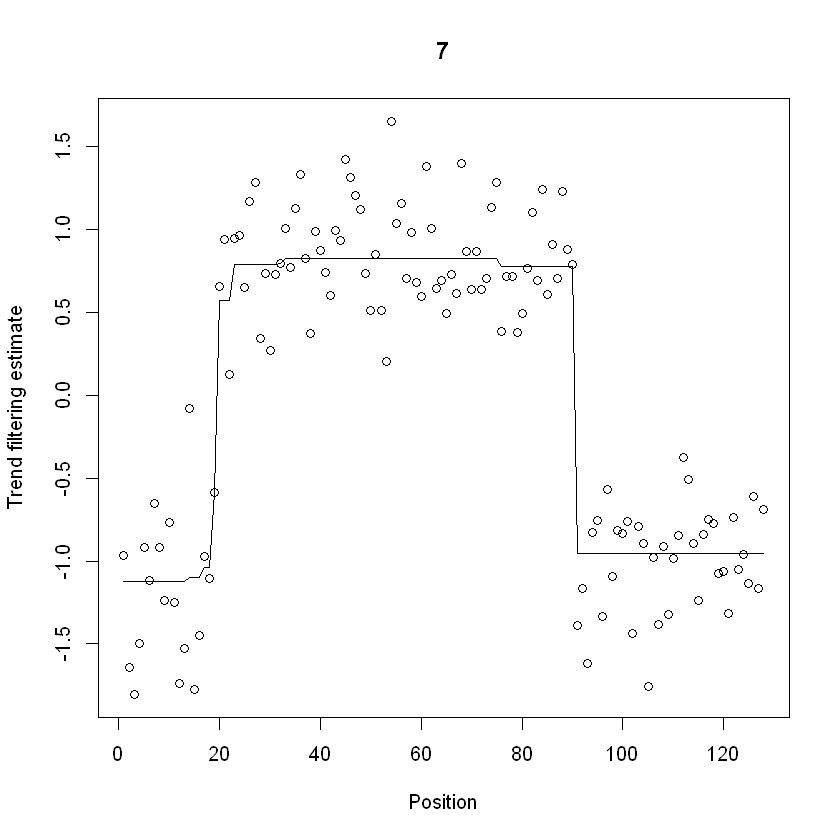

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


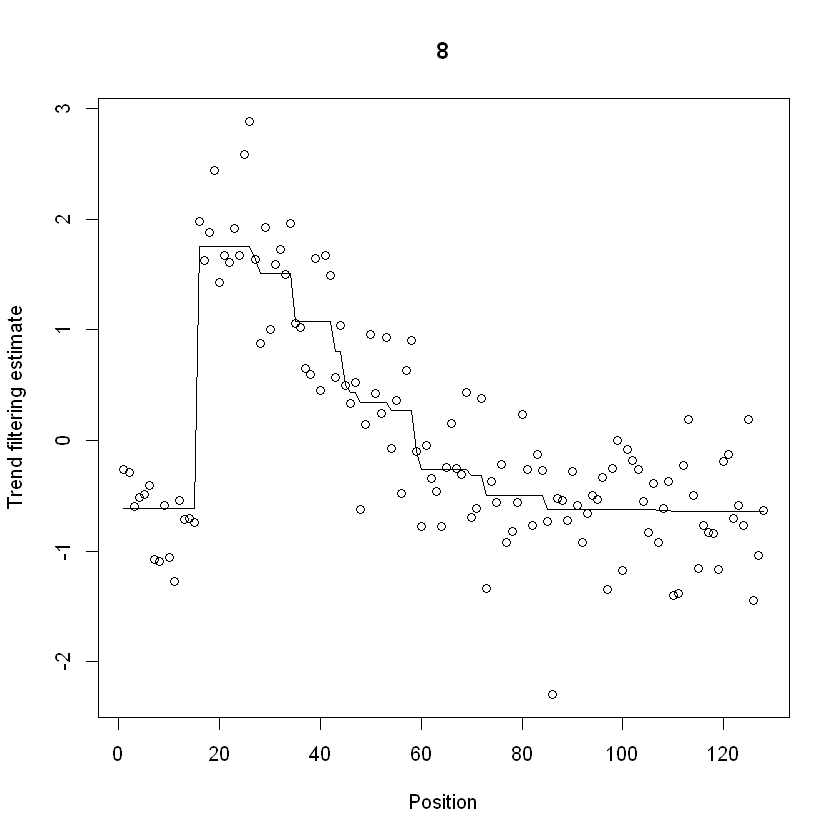

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


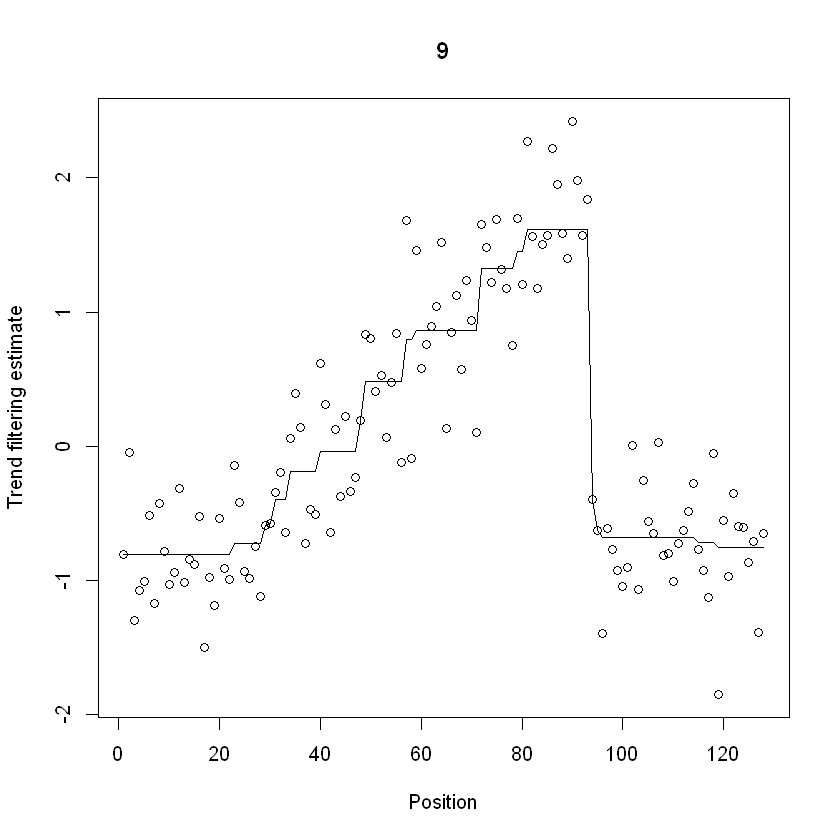

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


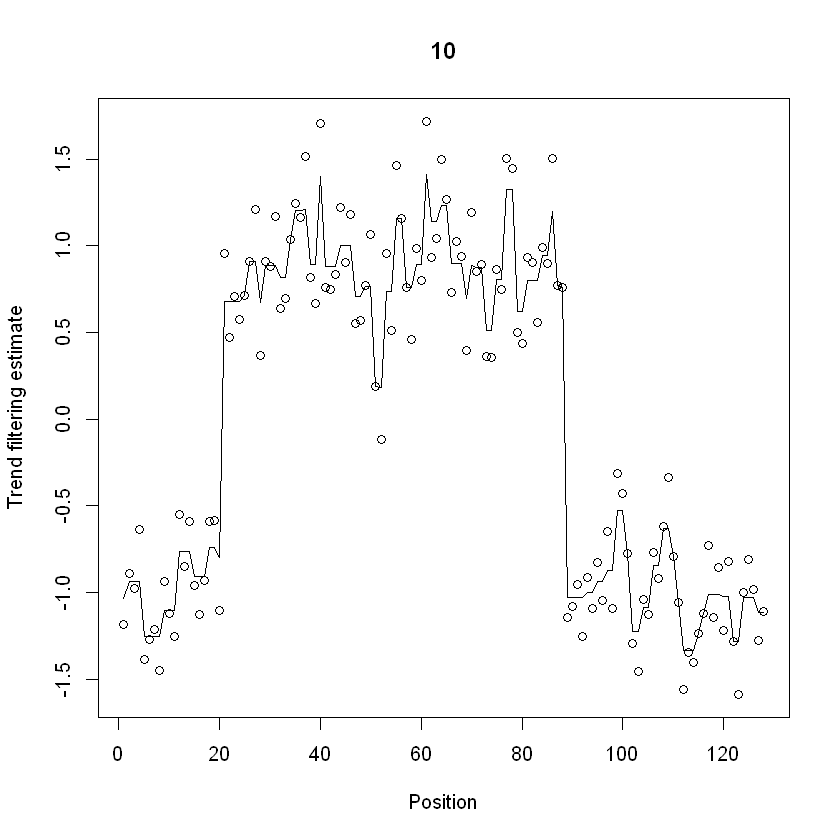

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


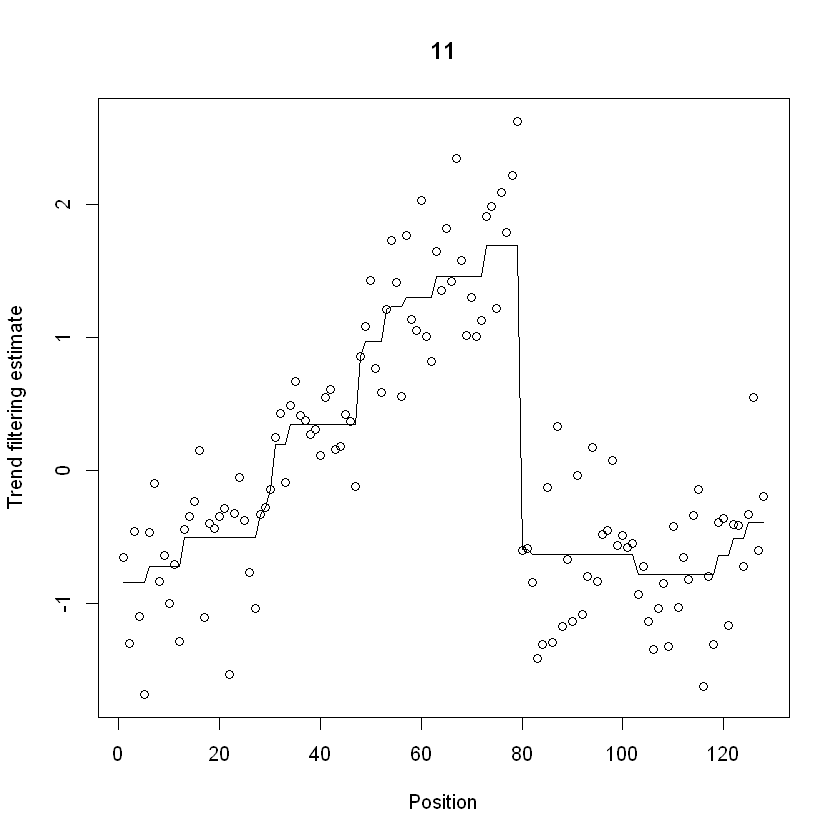

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


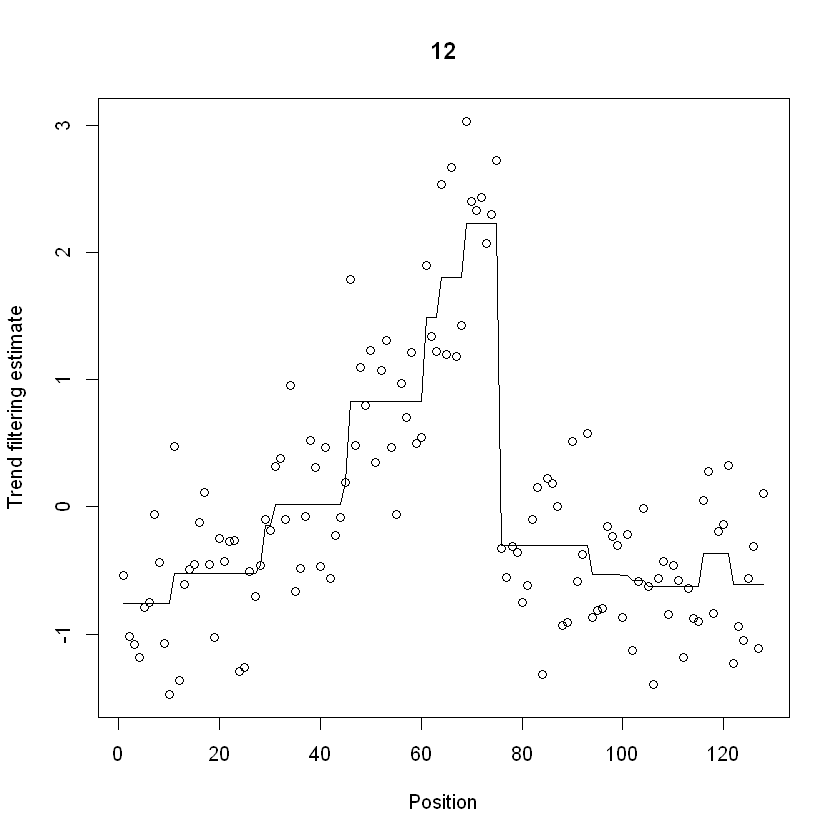

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


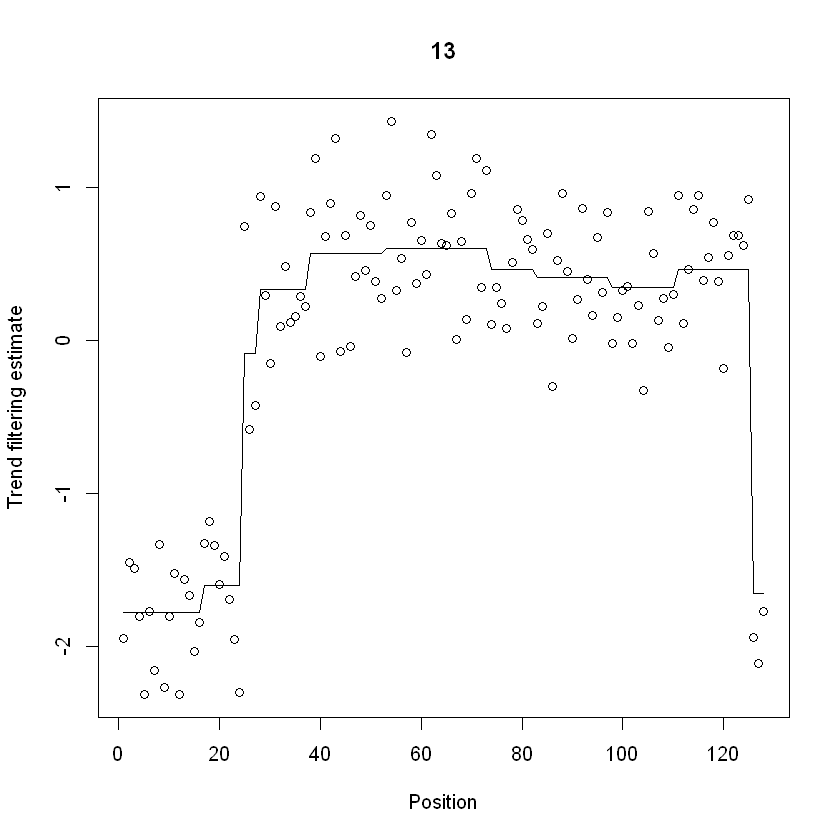

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


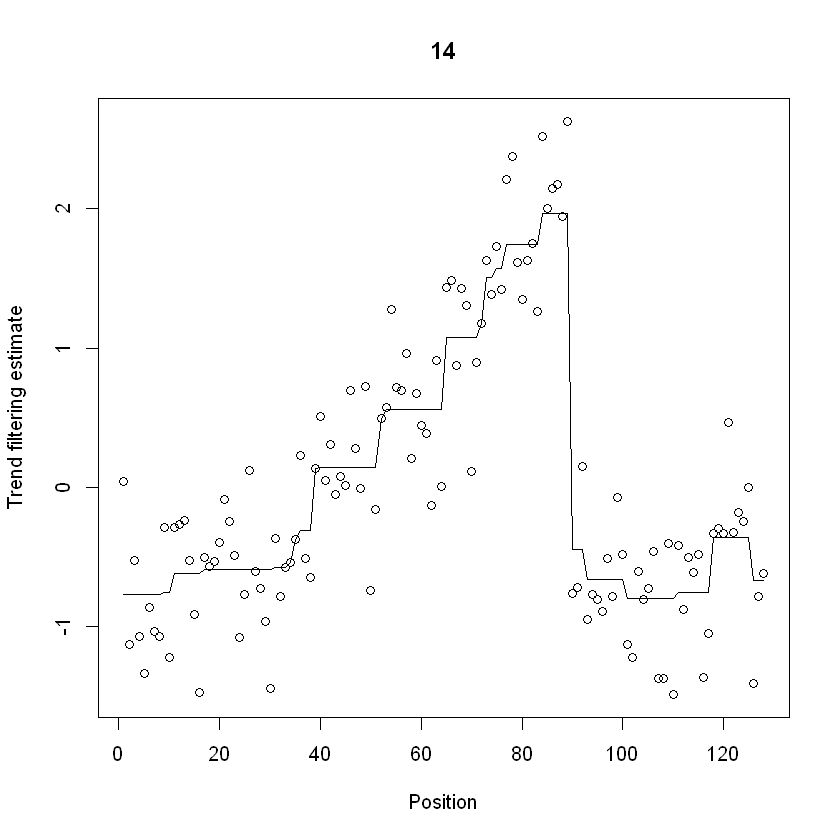

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


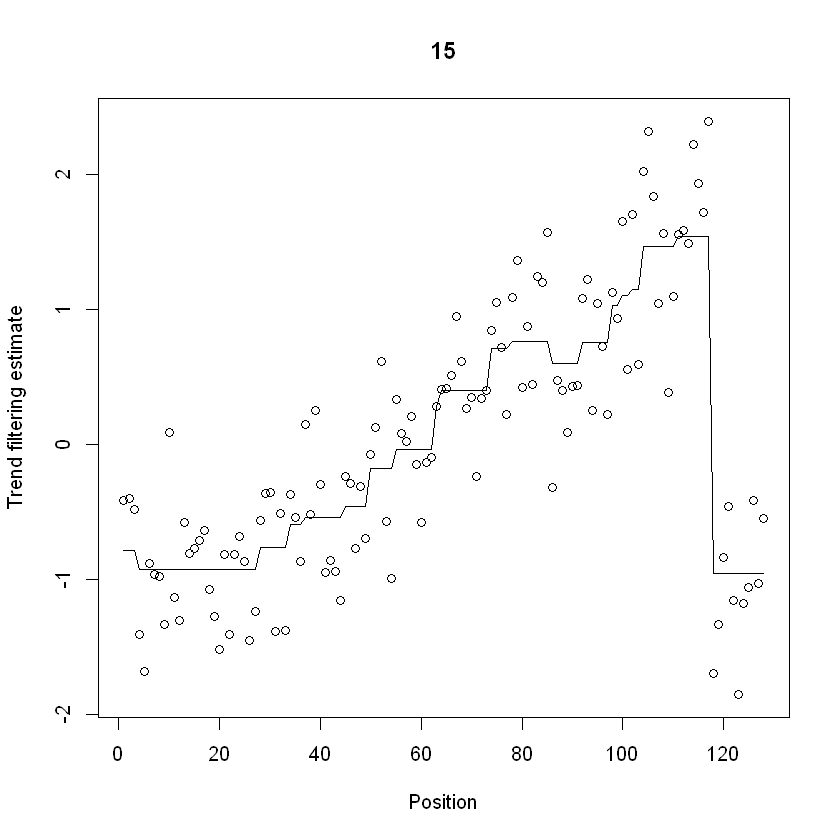

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


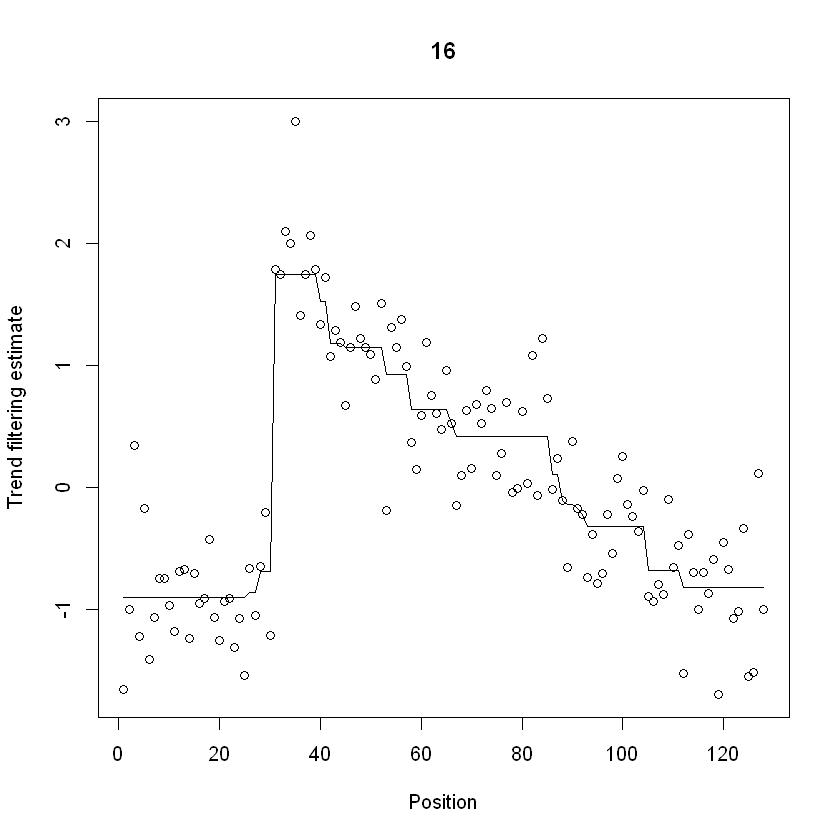

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


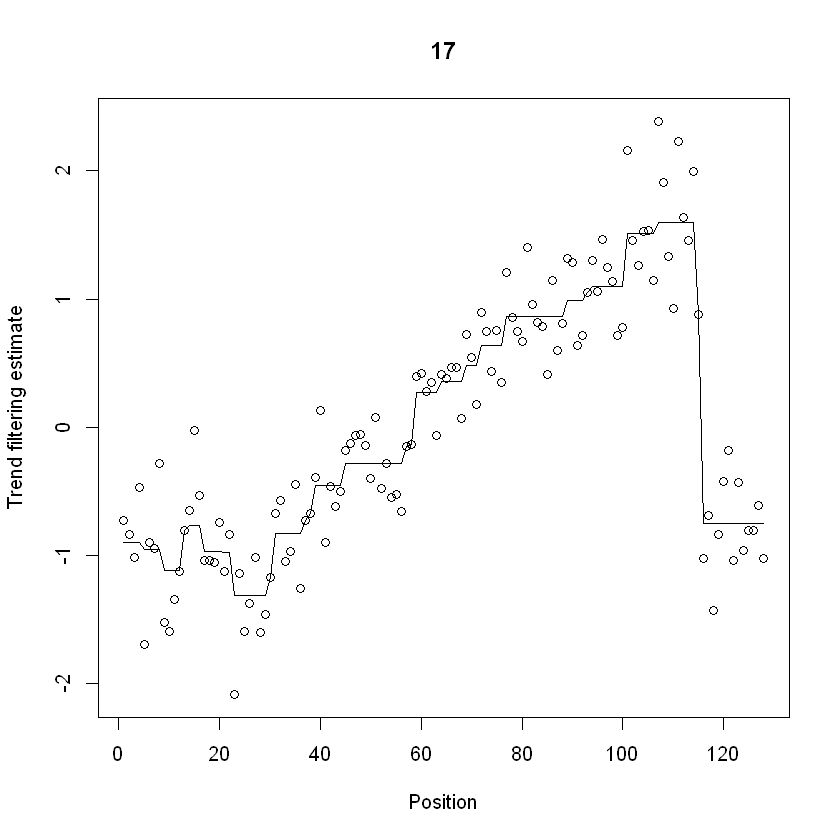

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


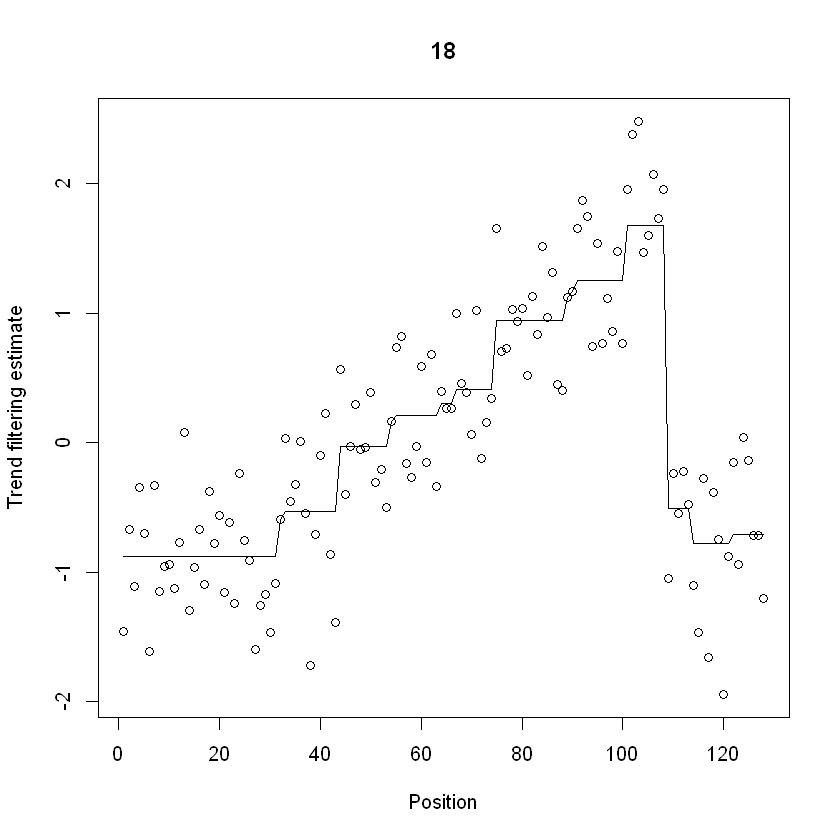

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


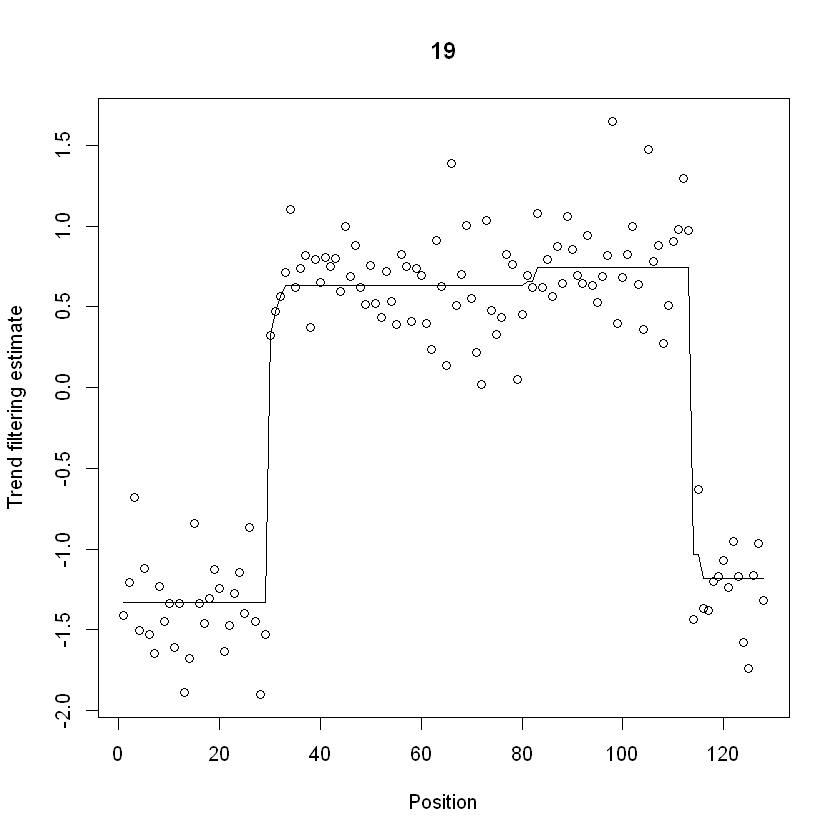

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


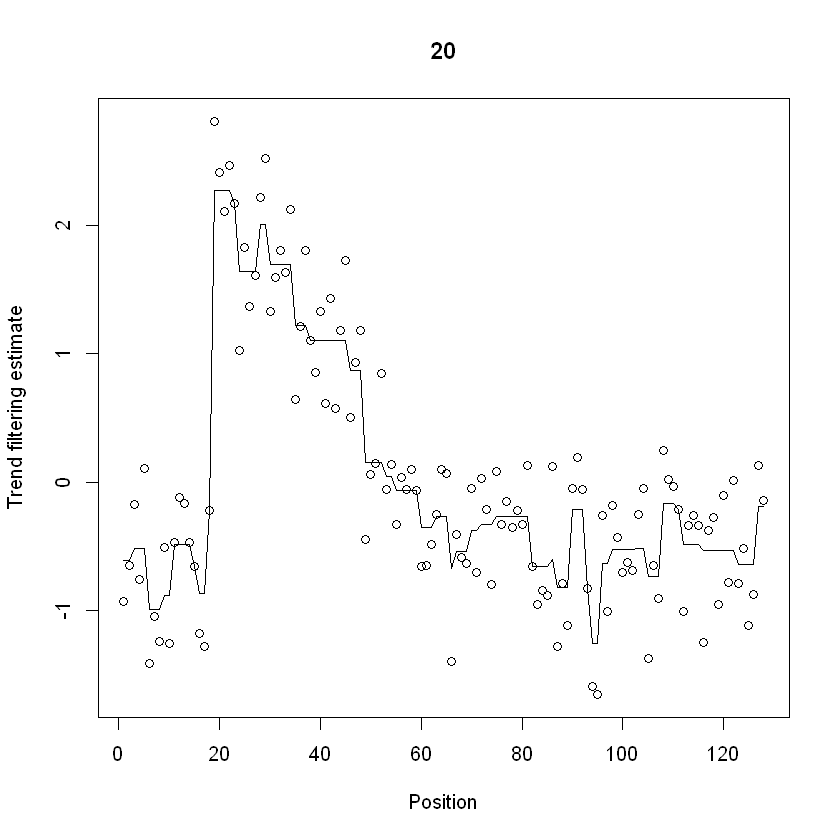

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


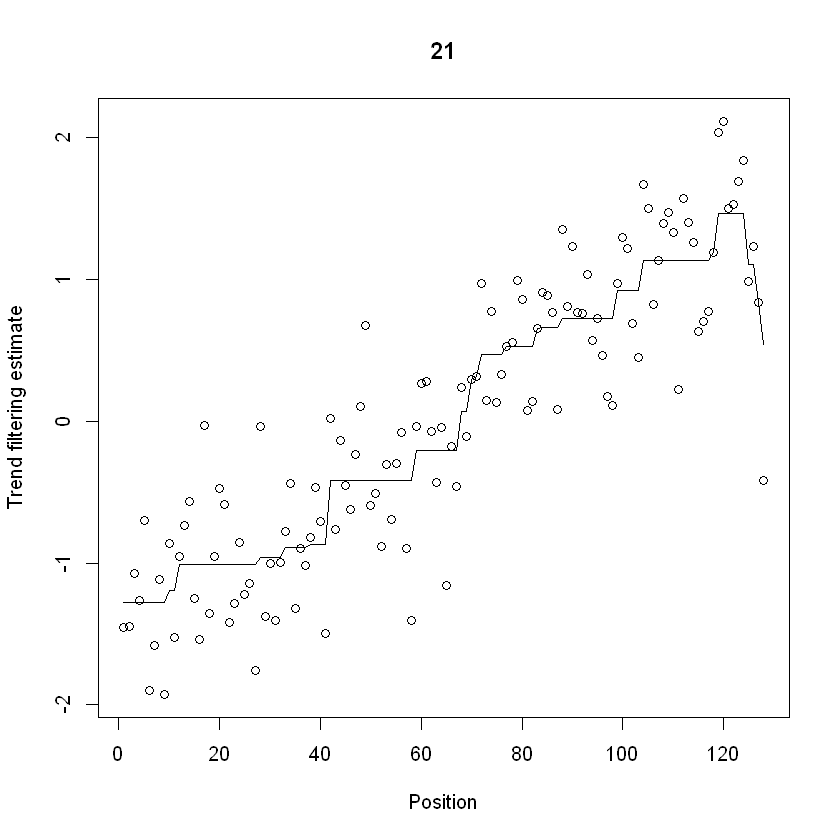

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


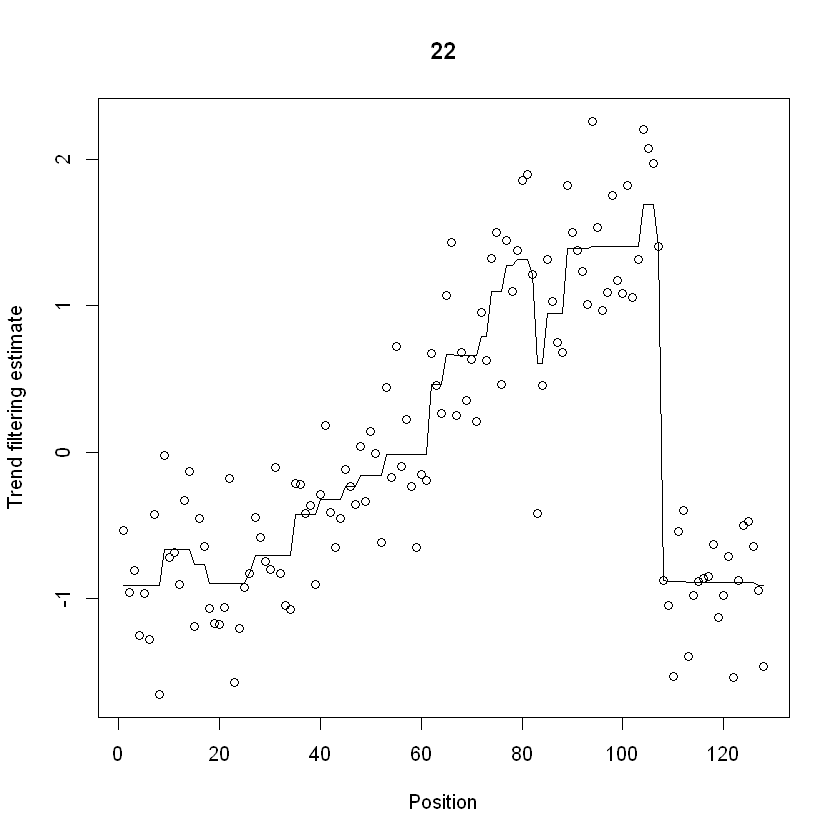

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


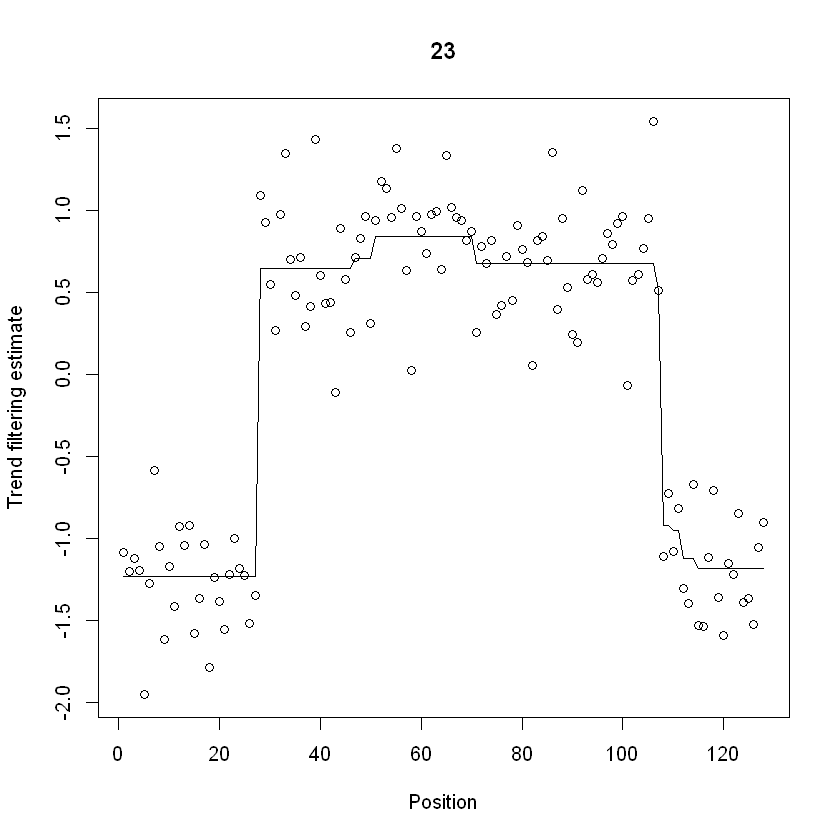

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


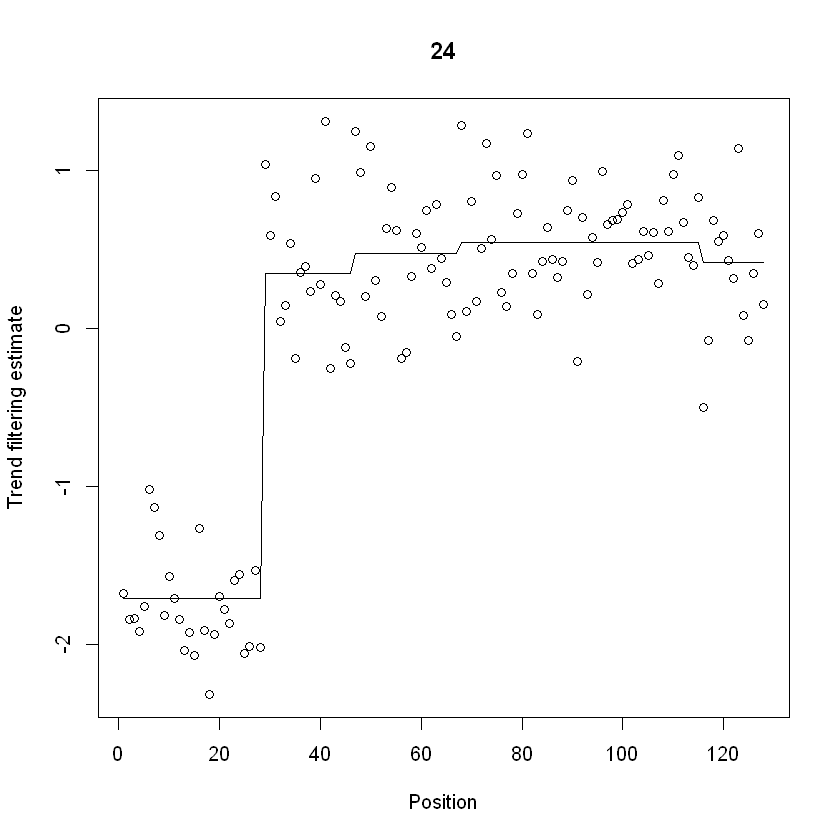

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


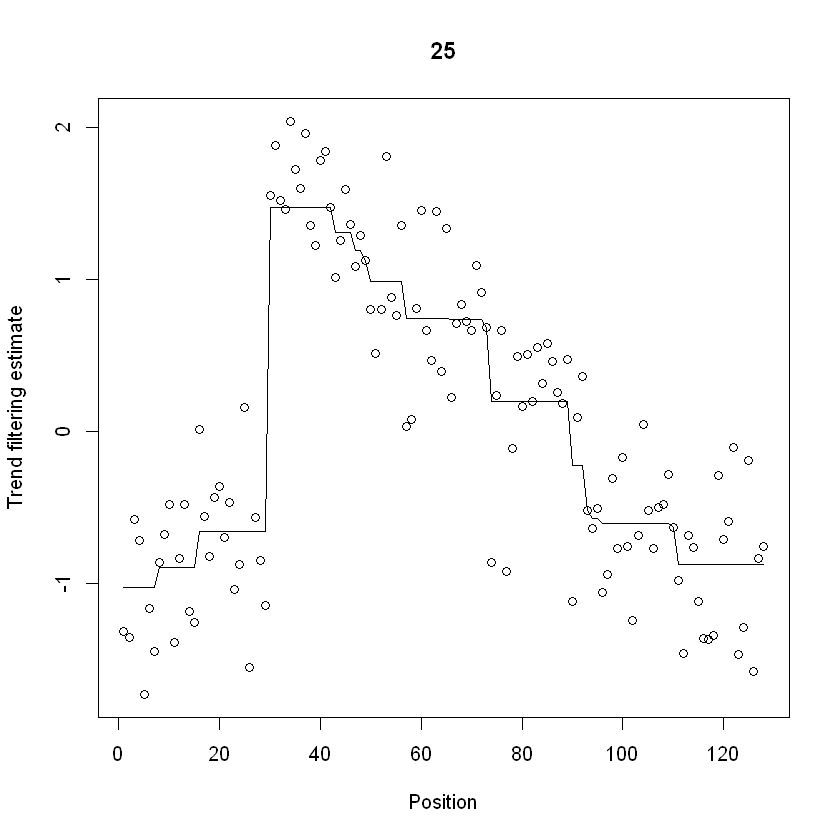

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


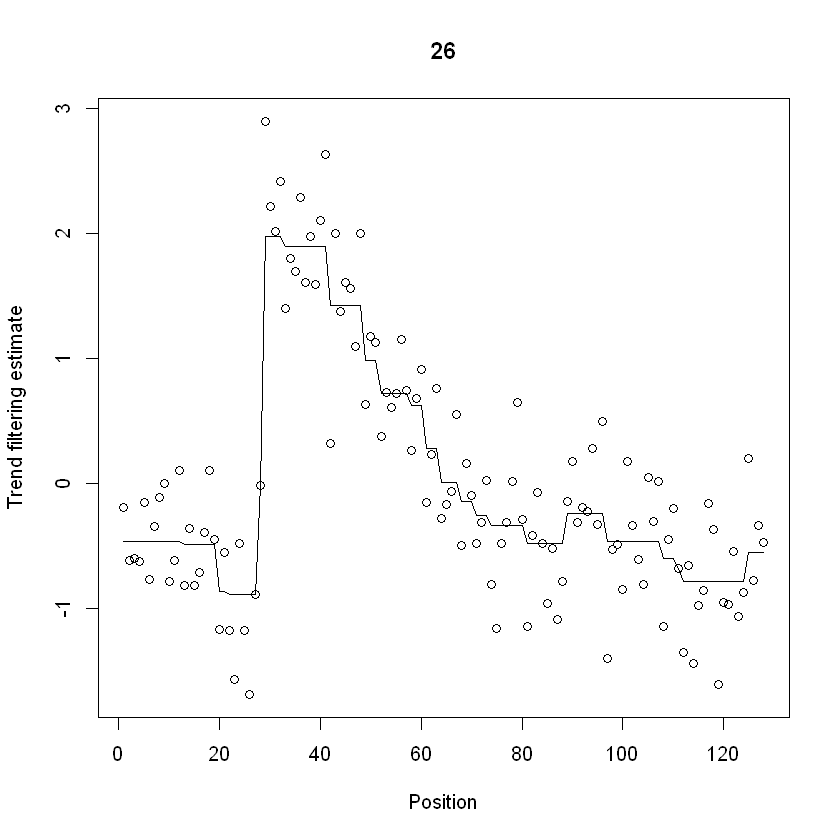

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


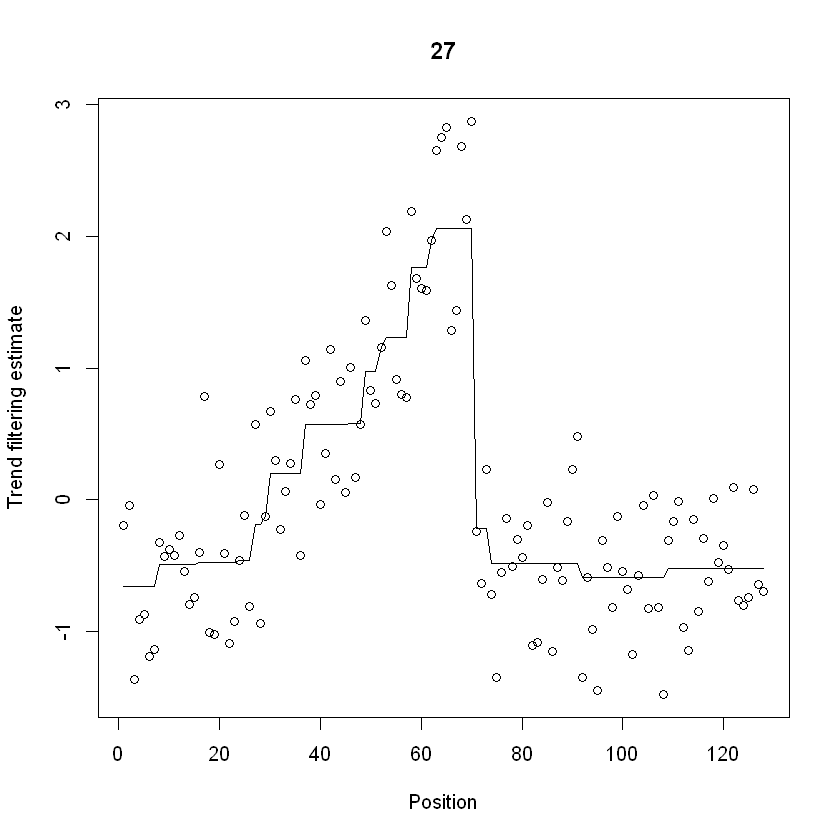

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


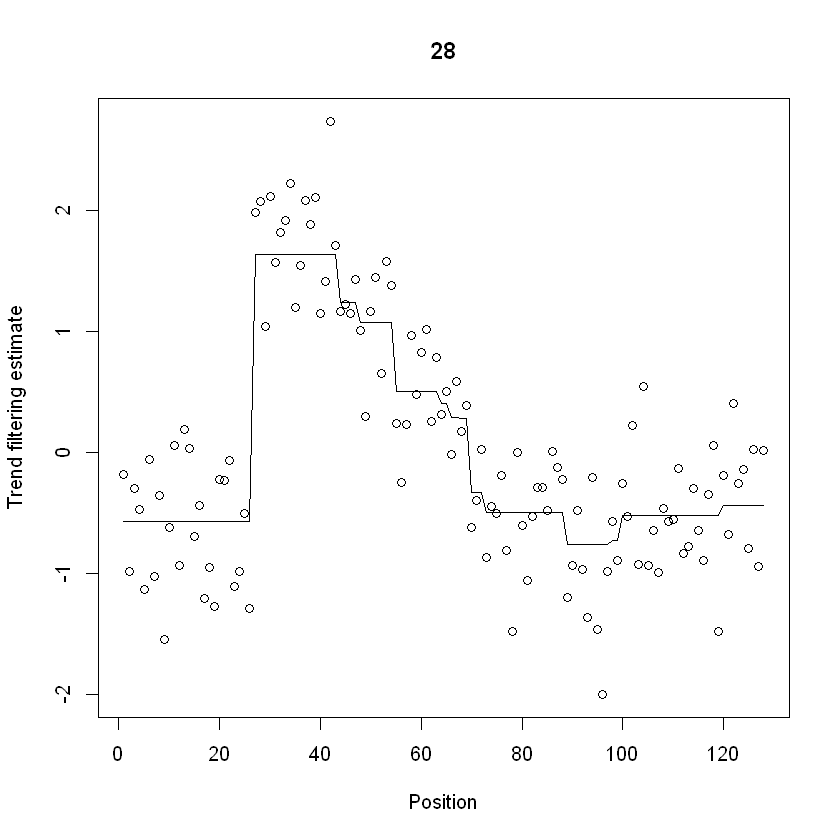

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


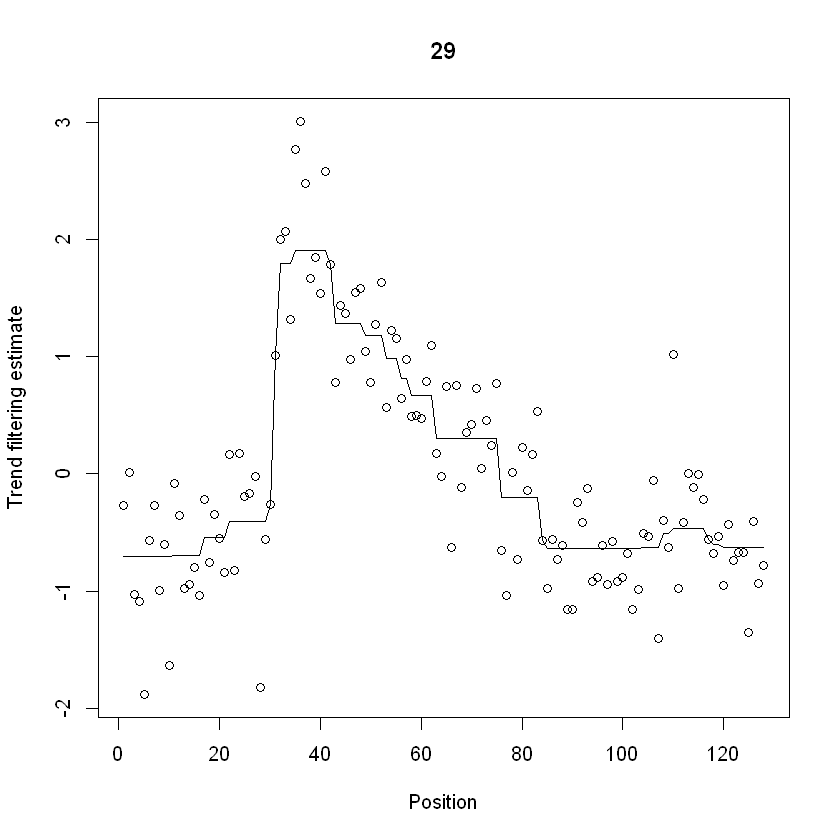

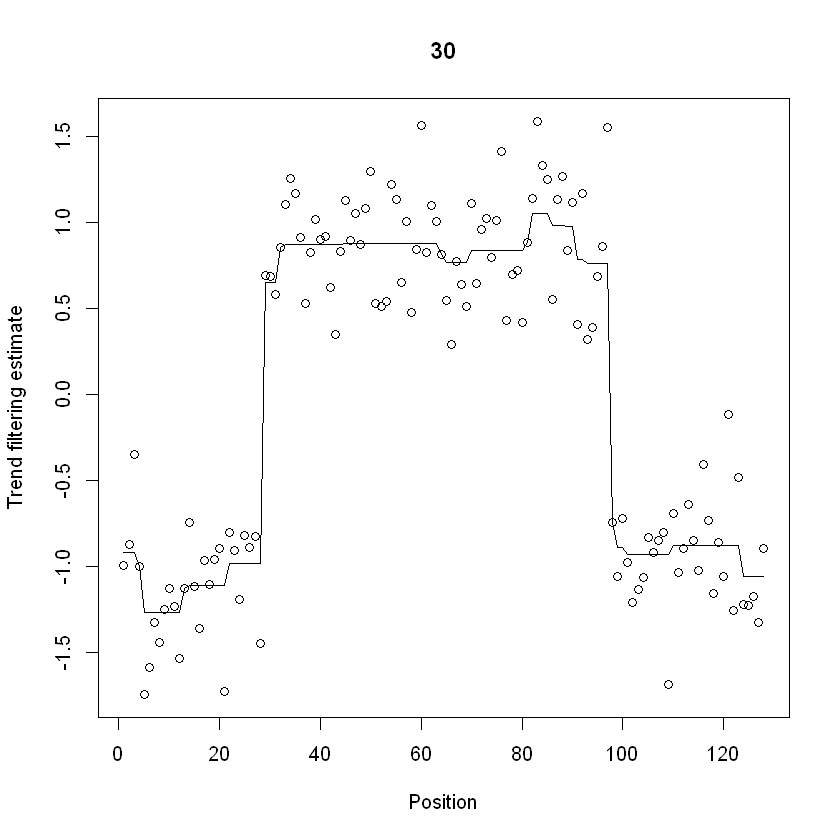

In [5]:
mse_1dlasso=lapply(series_id,function(x) lambdafunc(traindatalong[id==x]))

mse_1dlasso=as.data.table(mse_1dlasso)


#### I checked xerror from cptable to achieve best max depth values. Basically, I stopped searcing when the xerror first increase. 

In [6]:
treefunc=function(x){
    selected_dt=x
     a=5
     for(c in 2:5){
         for(i in 1:c){
     tree_fit=rpart(value~time,selected_dt,control=rpart.control(cp=0,maxdepth=c,minsplit=20,minbucket=10))
     
     tree_fit=as.data.table(tree_fit$cptable)
     
     
         if(tree_fit[i,xerror]<=tree_fit[i+1,xerror]){
             a=i
             break
         }
     }
     }
     
     return(a)
 }


treedepth=lapply(series_id,function(x) treefunc(traindatalong[id==x]))
treedepth=as.data.table(treedepth)

#### Representing with my best maxdepth values.

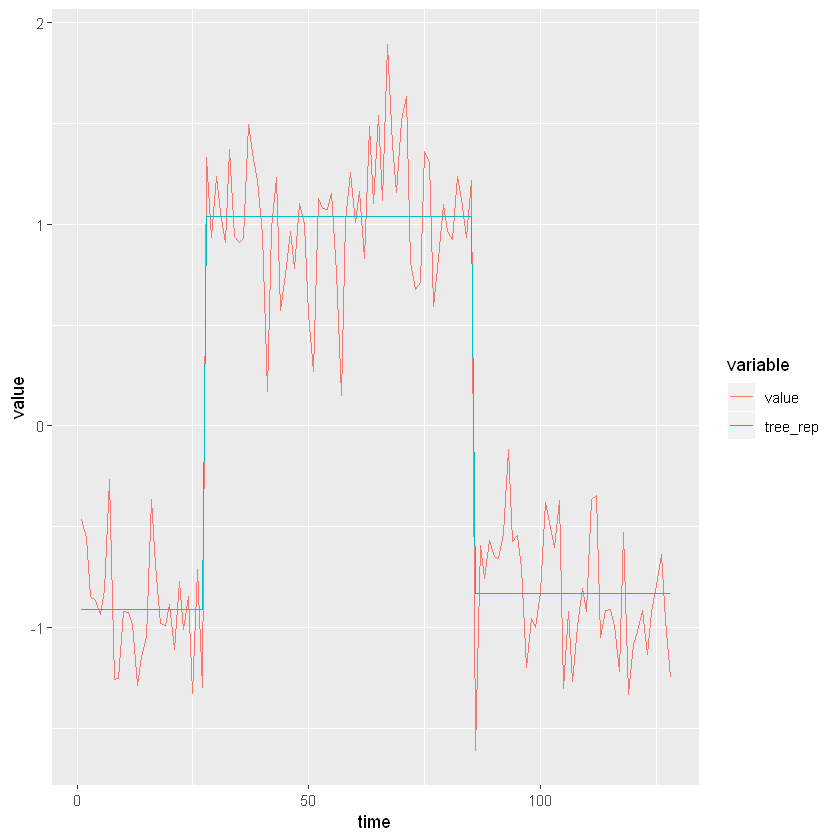

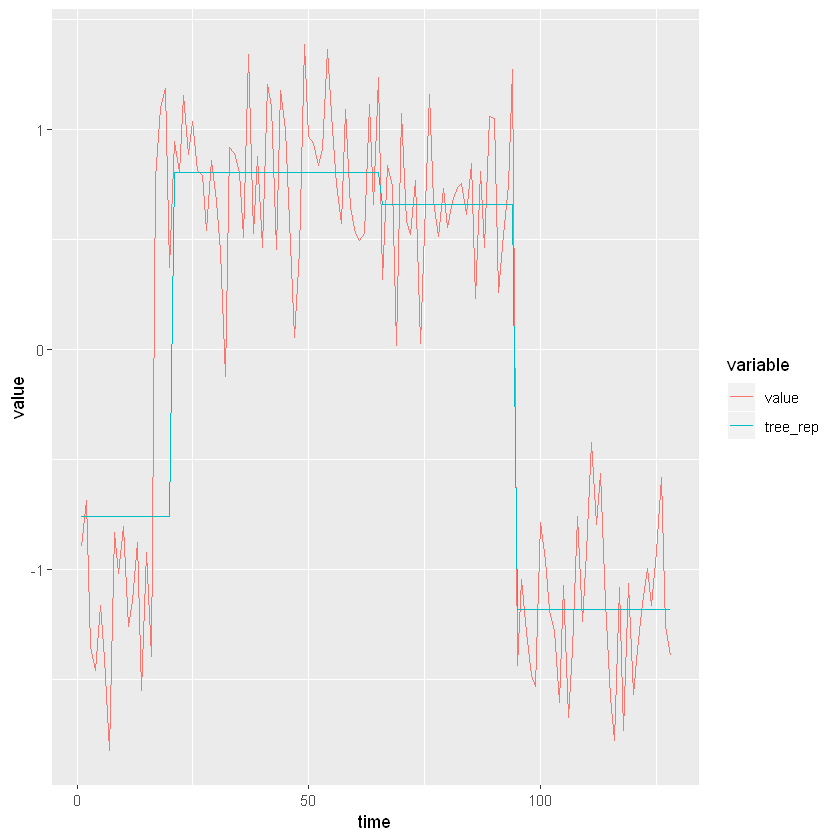

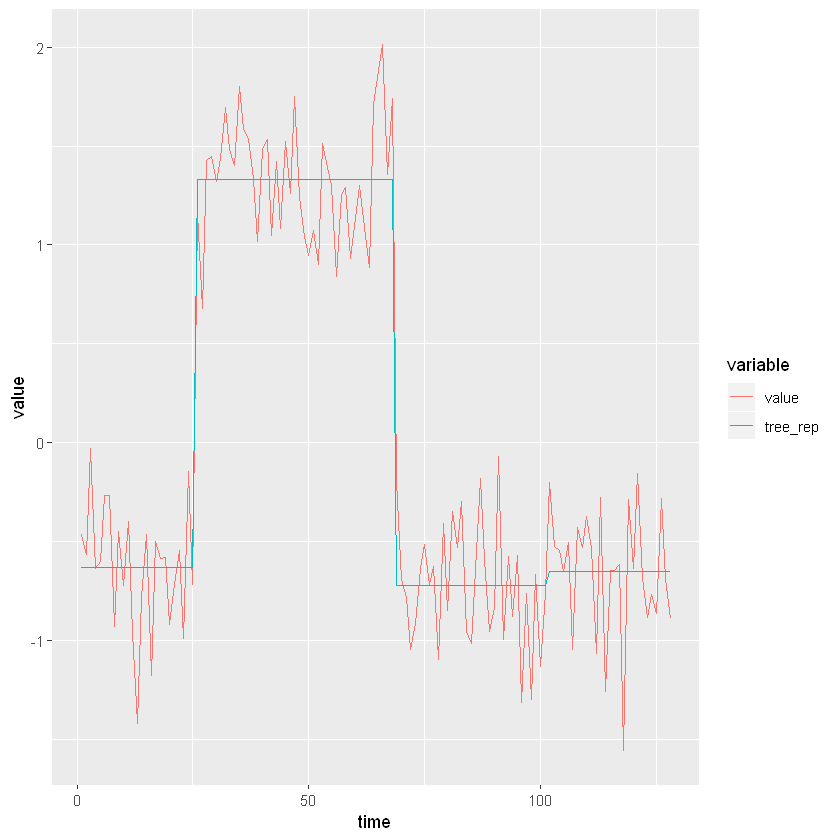

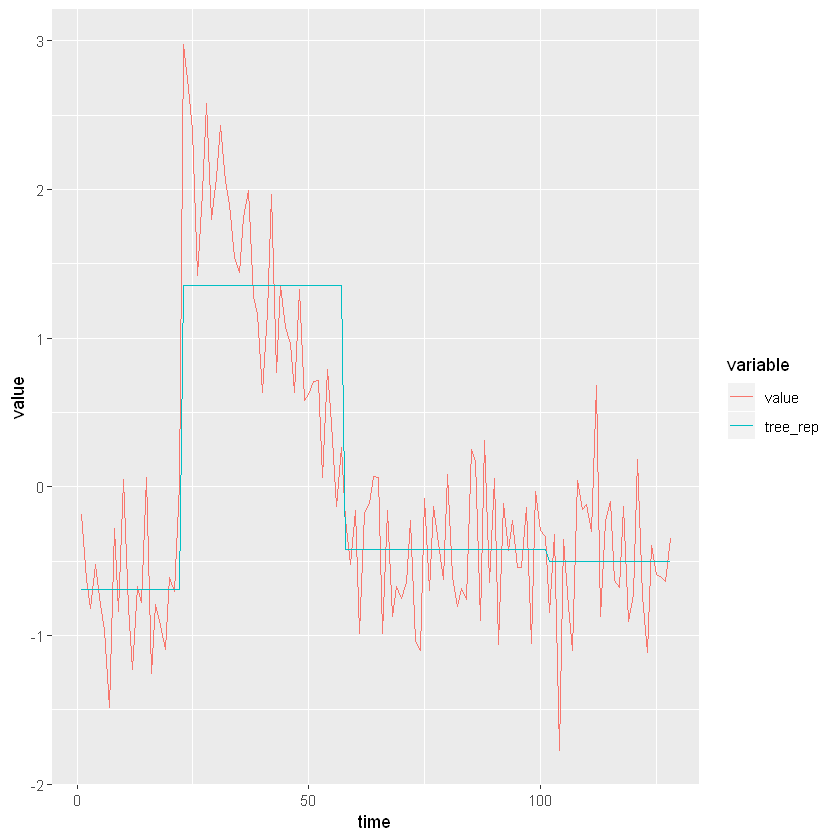

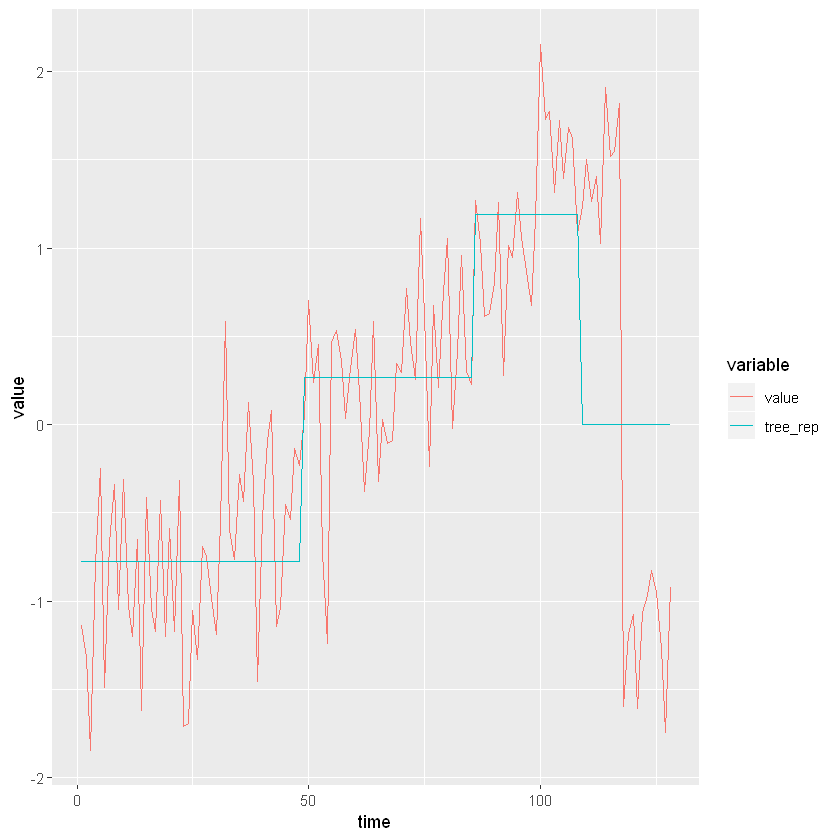

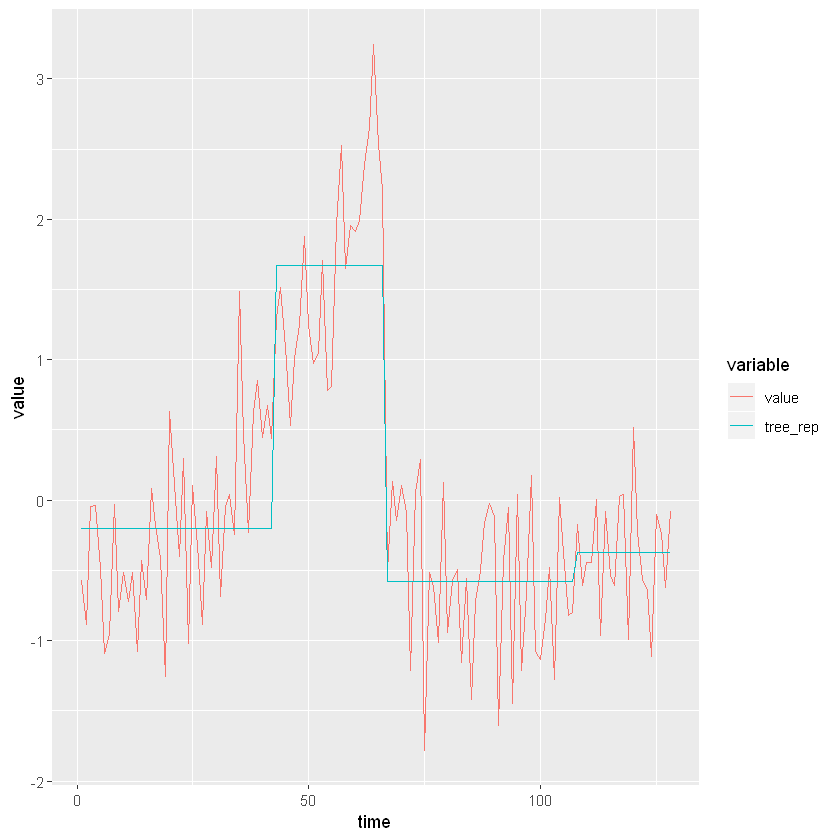

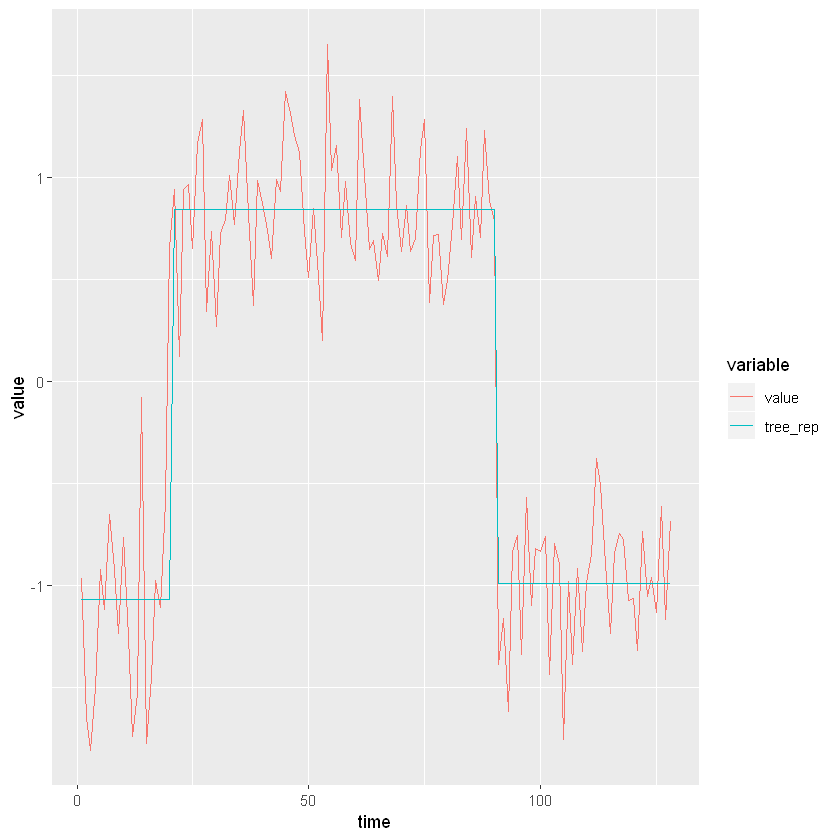

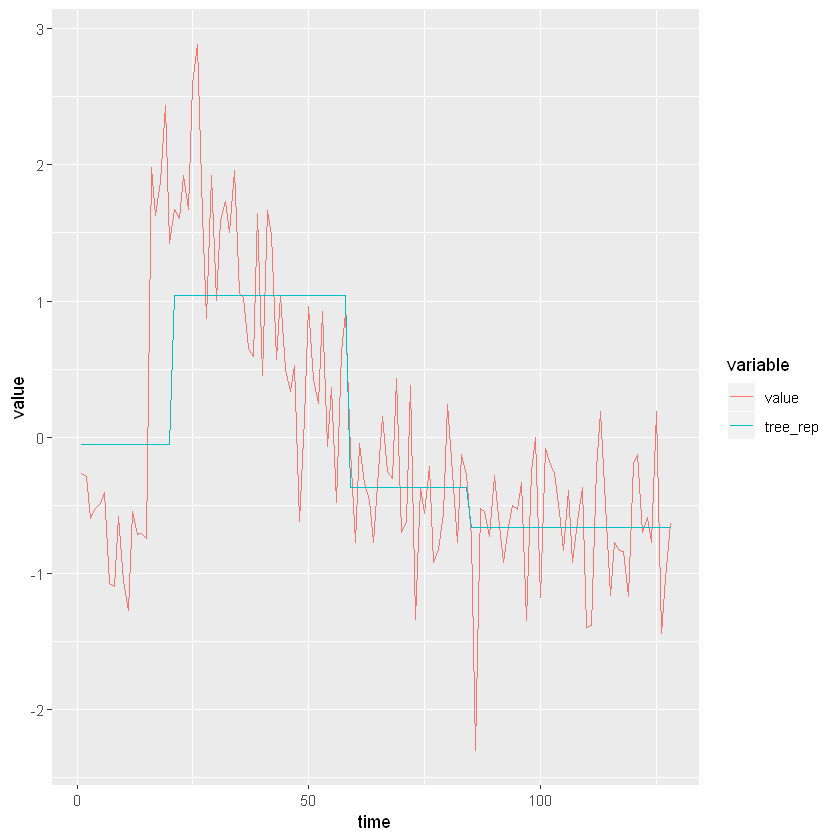

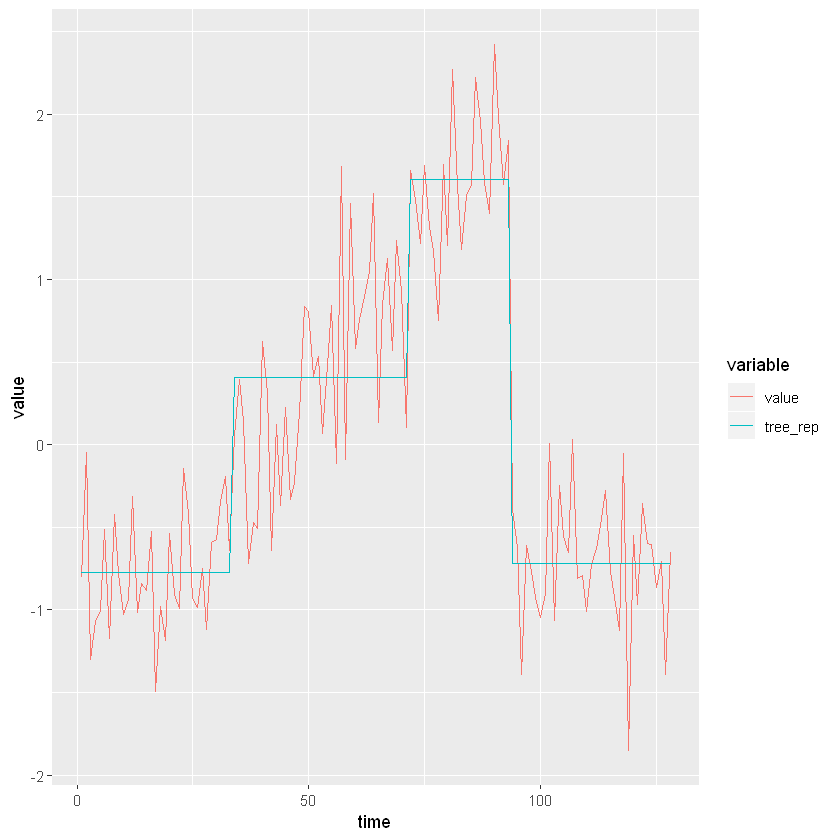

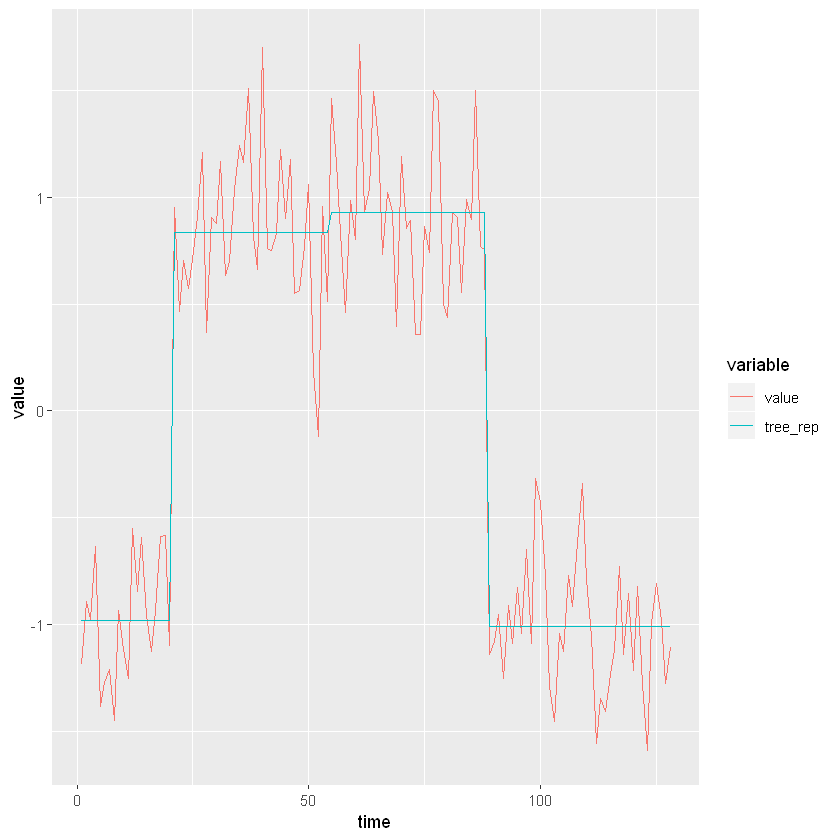

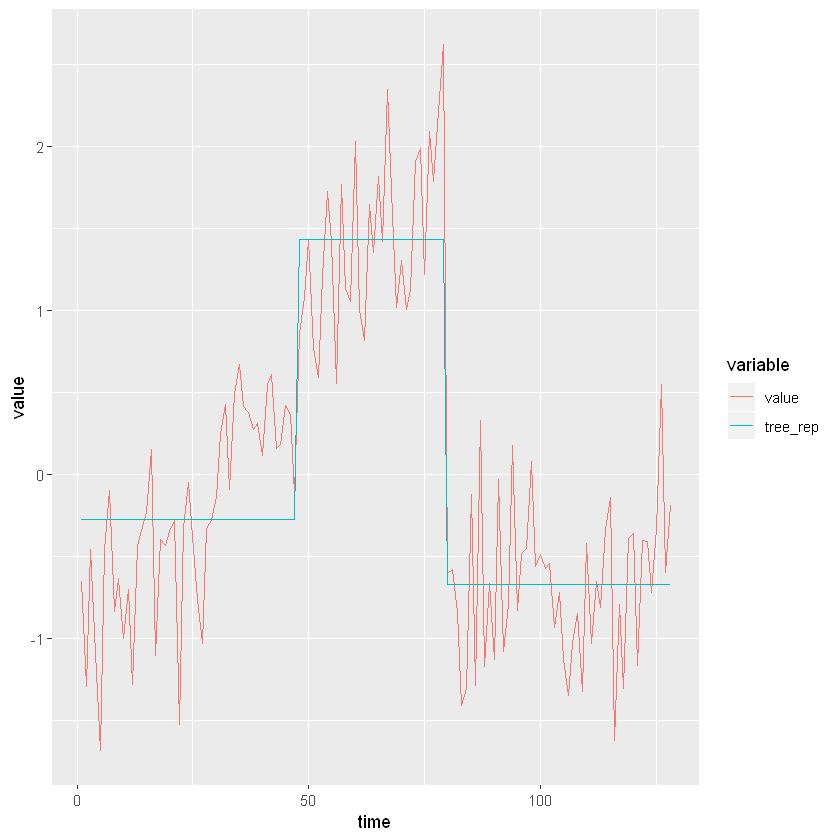

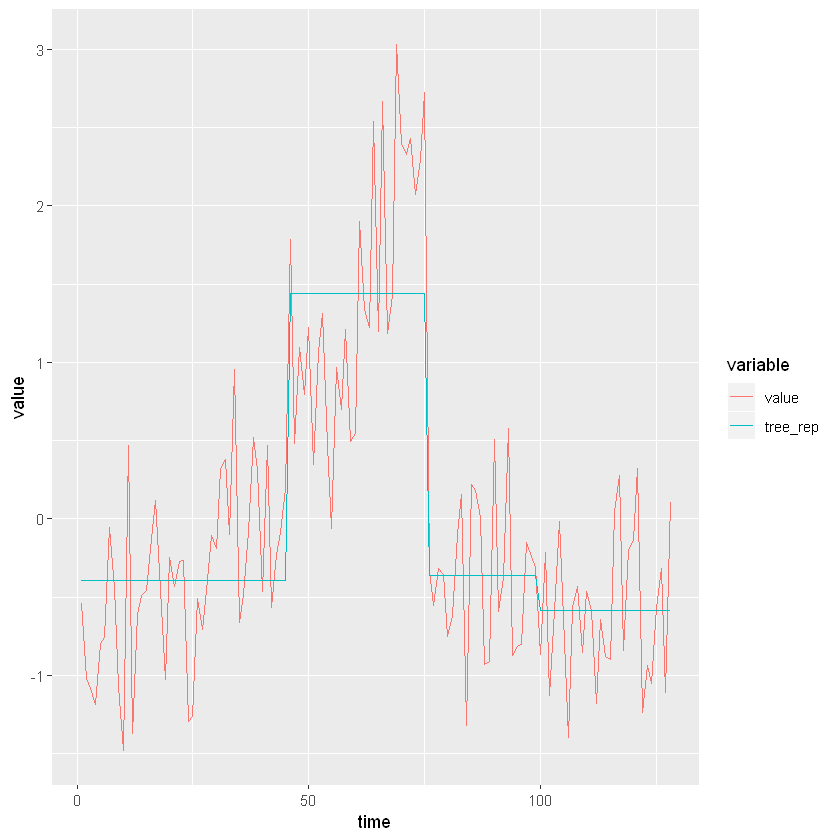

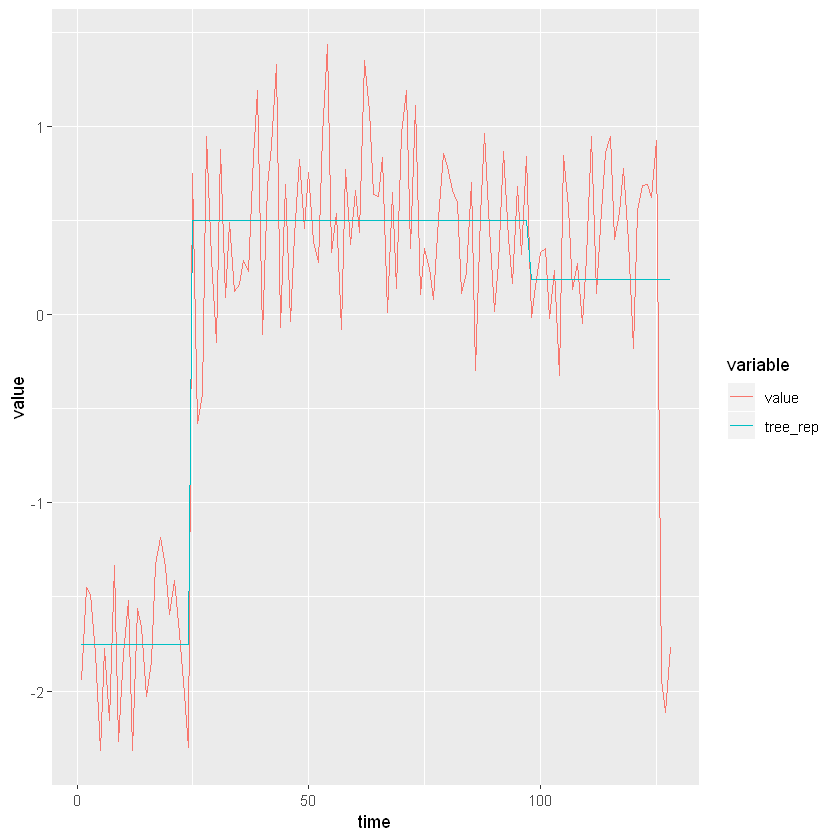

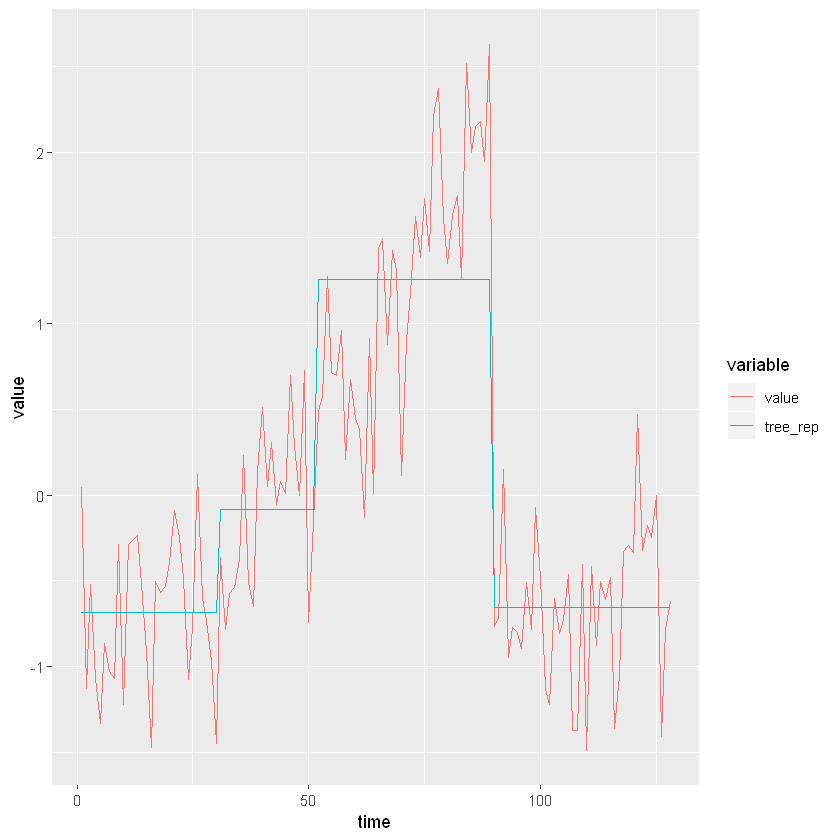

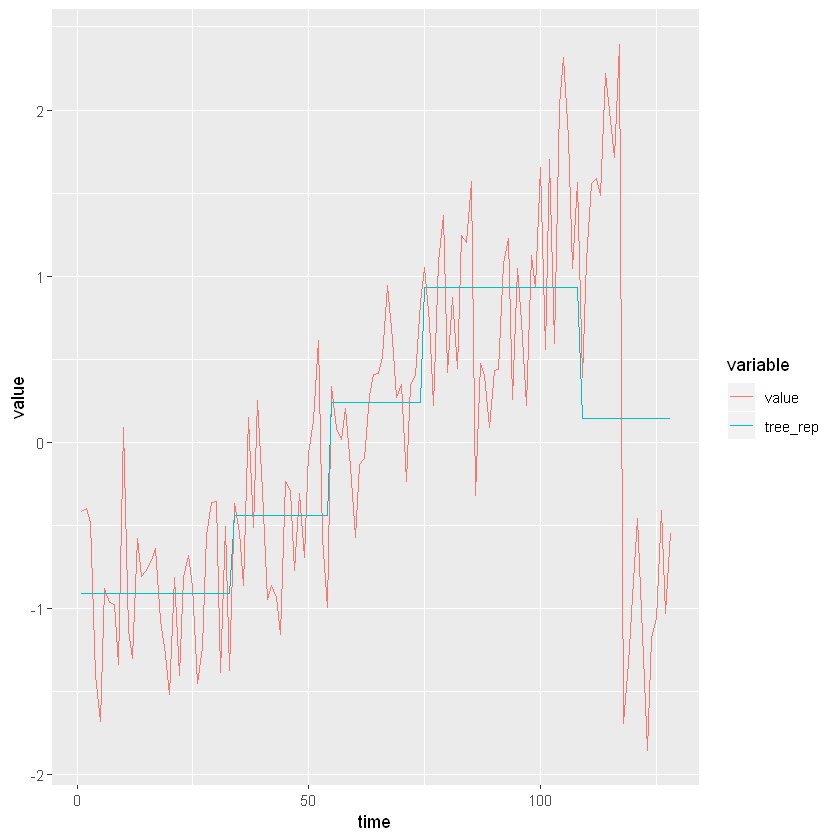

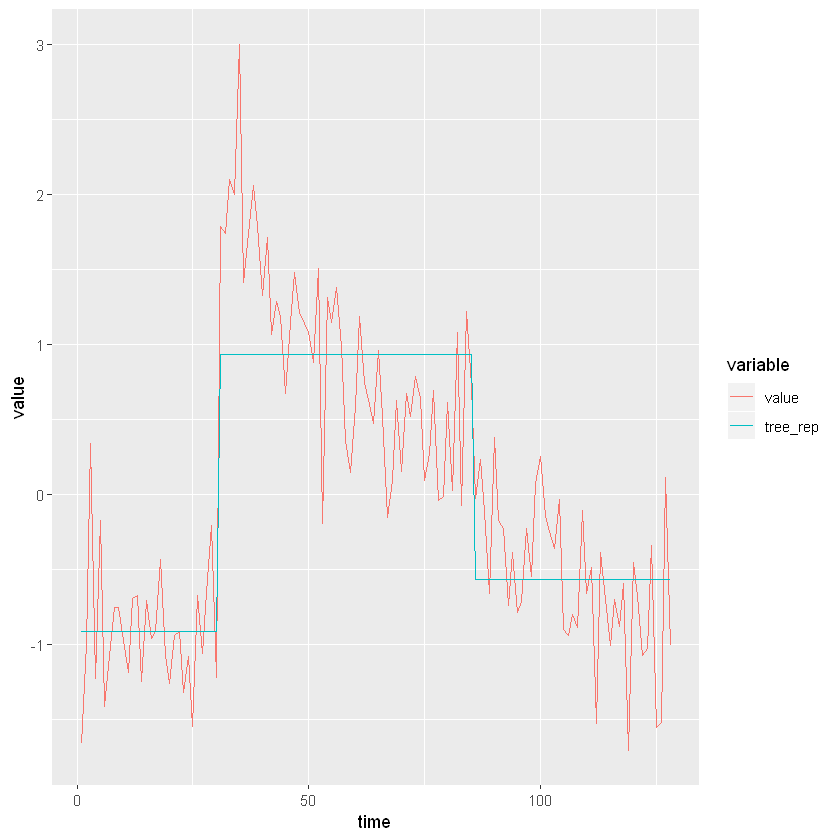

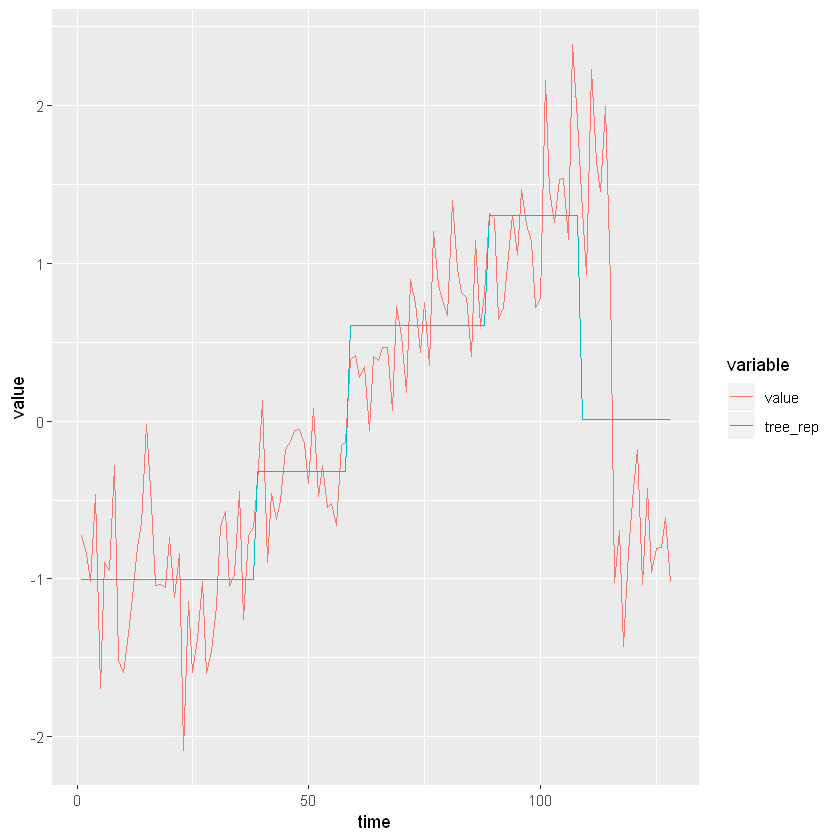

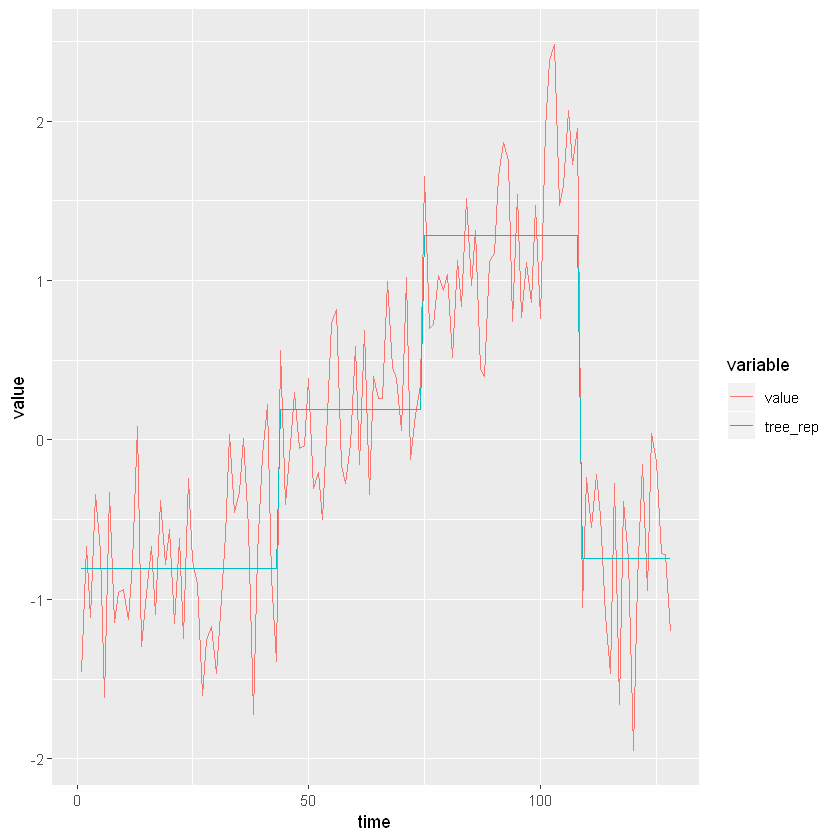

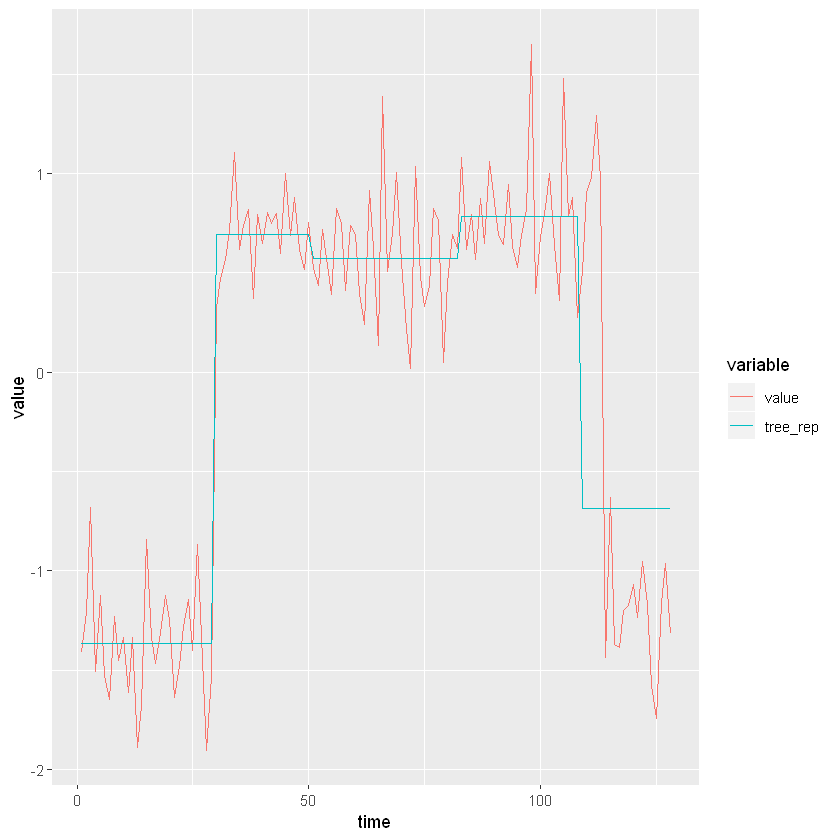

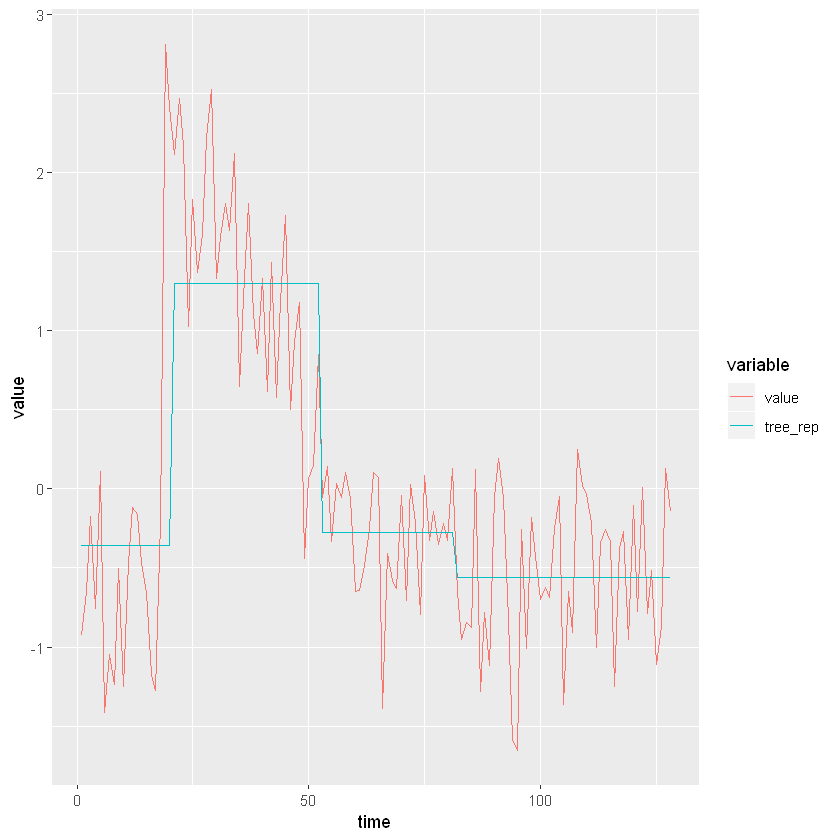

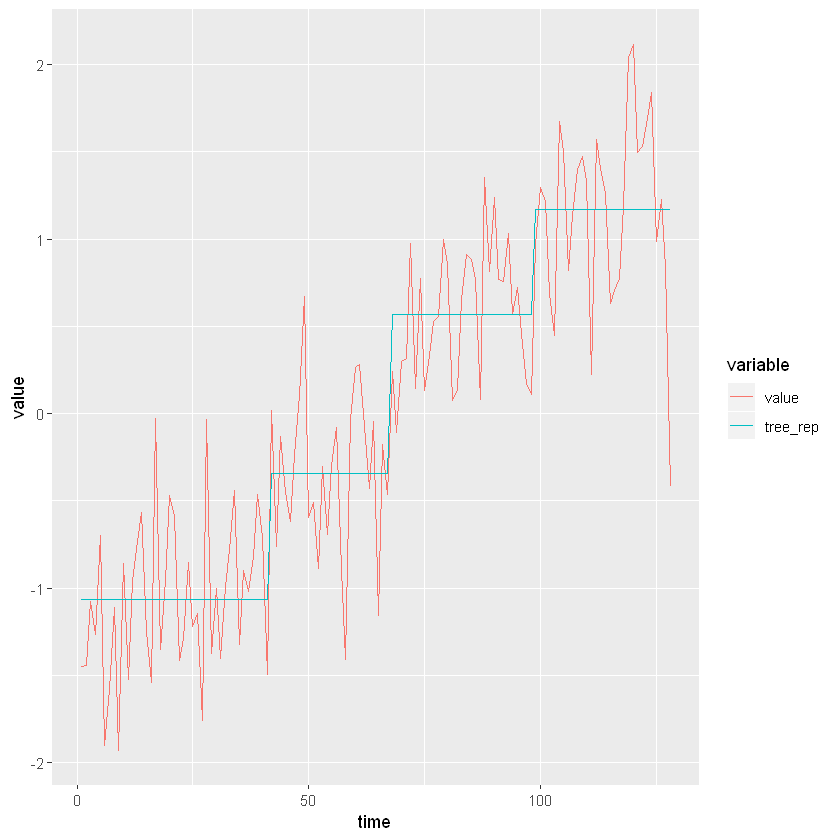

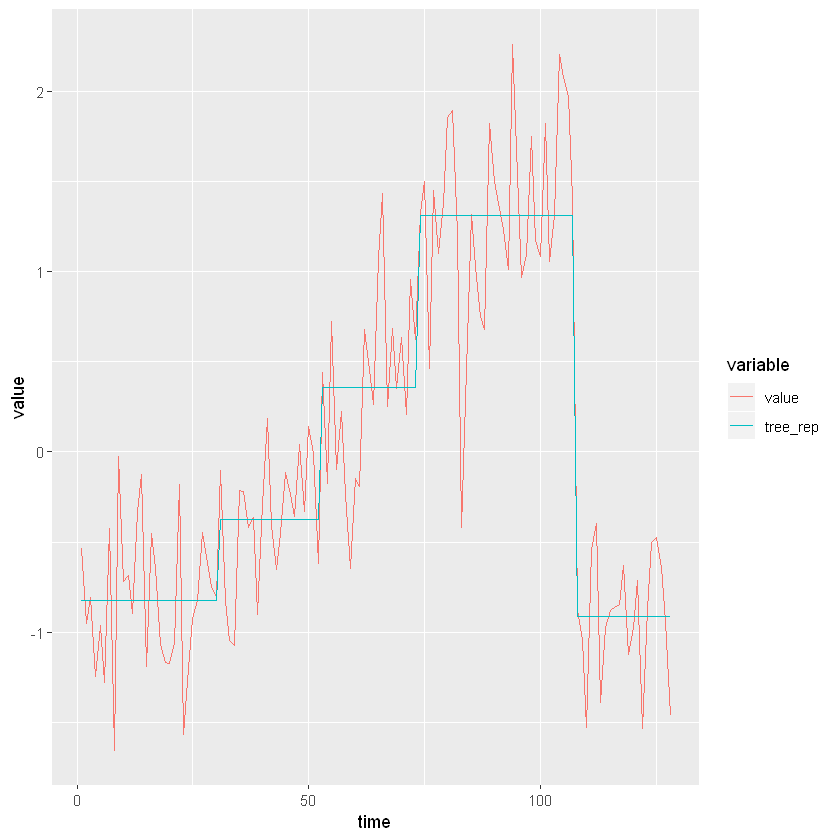

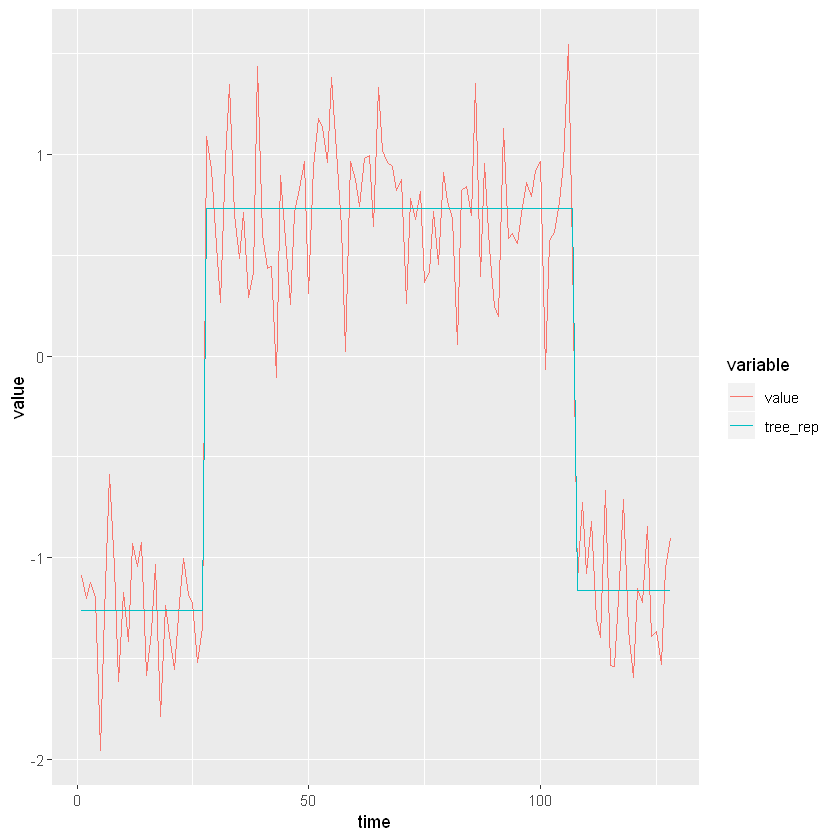

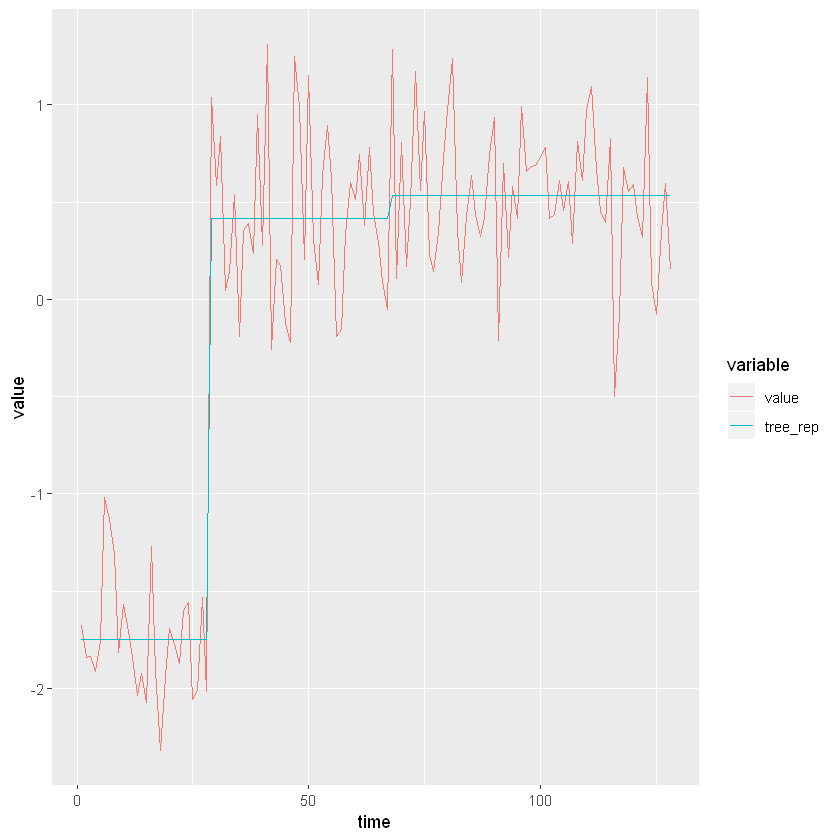

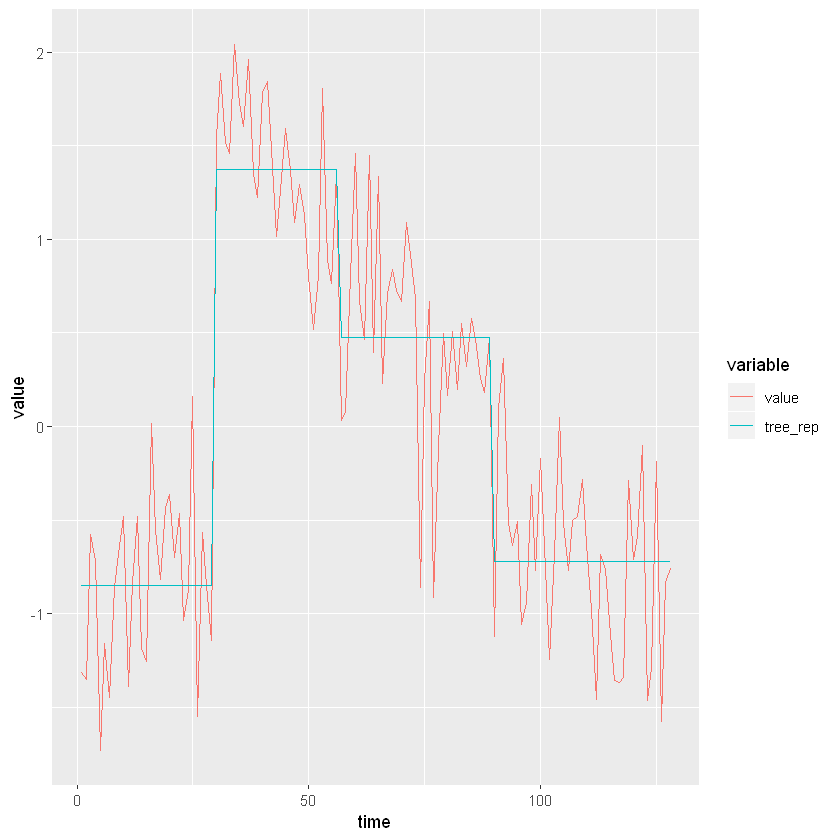

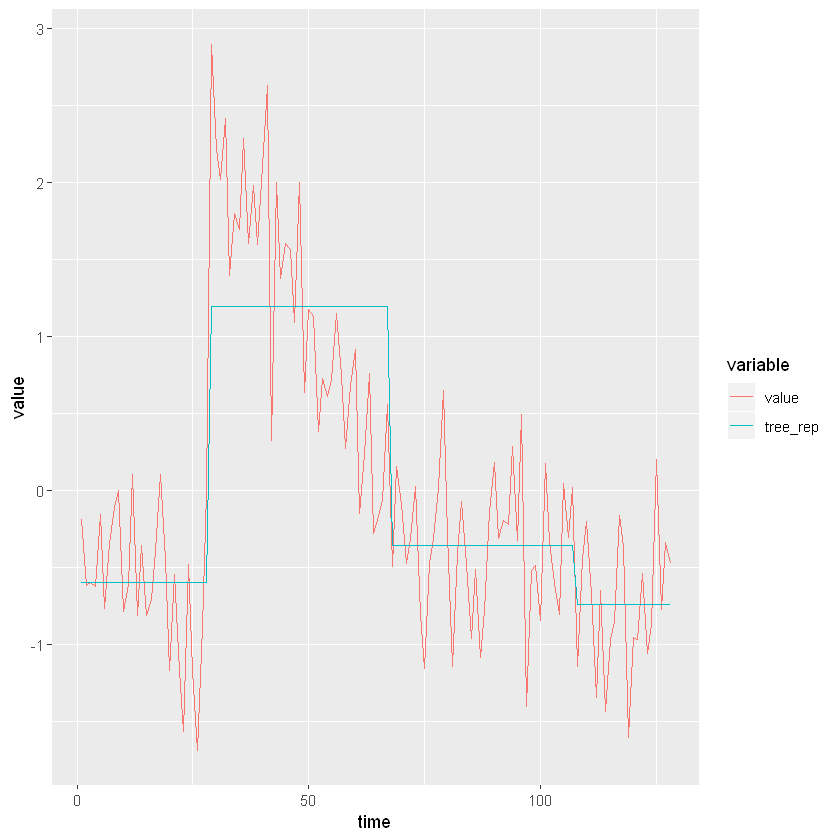

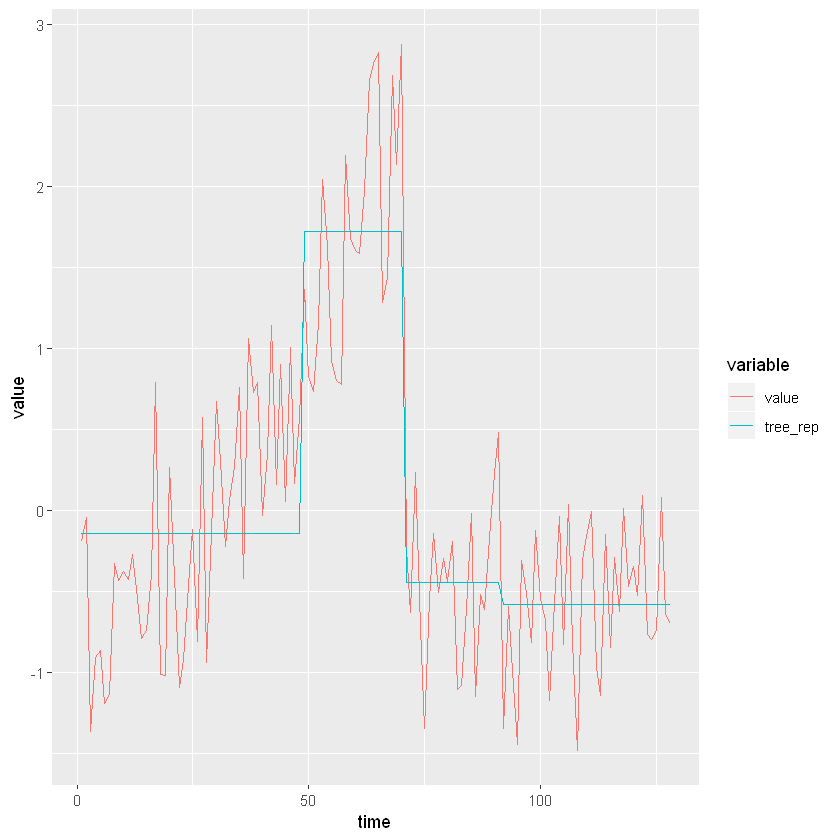

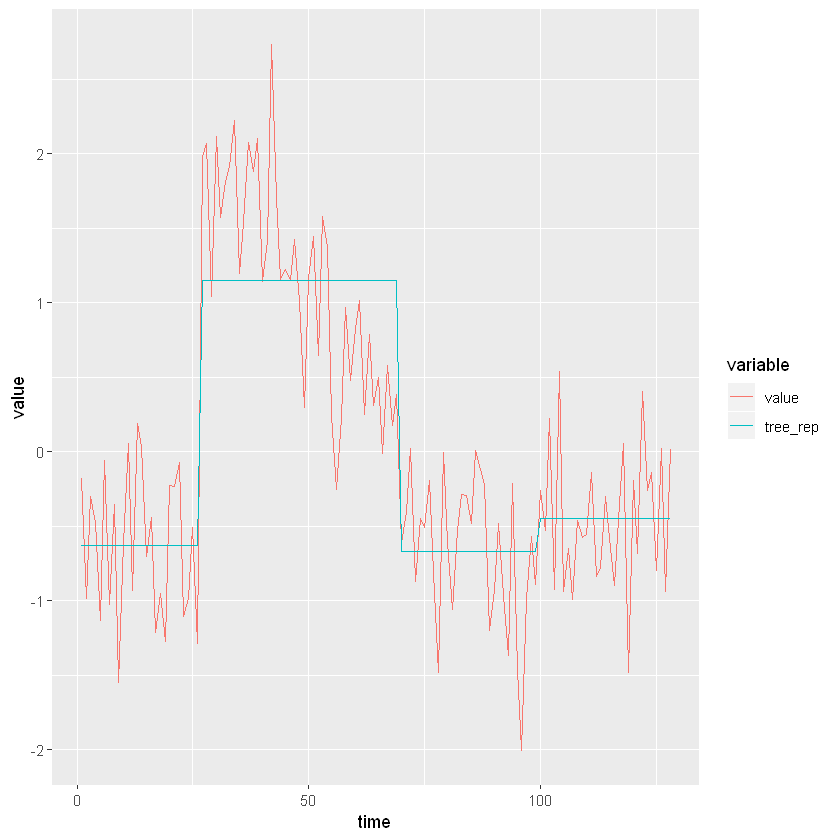

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]

[[30]]


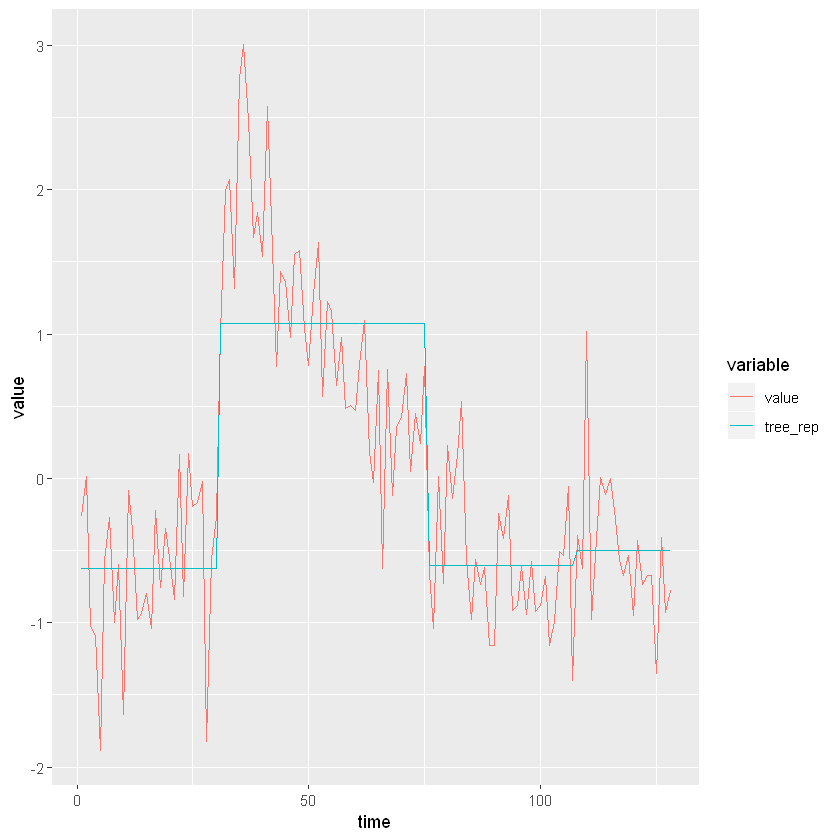

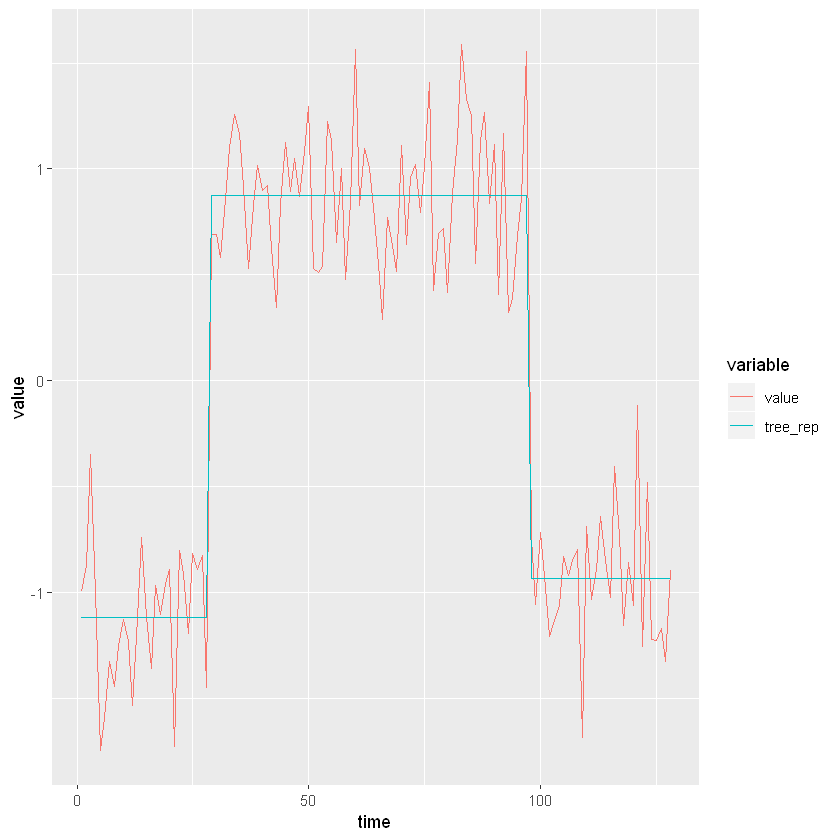

In [7]:
treeplot=function(i){
     selected_dt=traindatalong[id==i]
    
     tree_fit=rpart(value~time,selected_dt,control=rpart.control(cp=0,maxdepth=treedepth[[i]],minsplit=50,minbucket=20))
     
     selected_dt[,tree_rep:=predict(tree_fit,selected_dt)]
     
     data_plot=melt(selected_dt,id.vars='time',measure.vars=c('value','tree_rep'))
     
     ggplot(data_plot,aes(x=time,y=value,color=variable))+
         geom_line()
 }
lapply(series_id,function(x) treeplot(x))


## MSE Calculation and Box Plots
#### MSE values from Tree Representation

In [8]:
treemse=function(i){
selected_dt=traindatalong[id==i]
    
    tree_fit=rpart(value~time,selected_dt,control=rpart.control(cp=0,maxdepth=treedepth[[i]],minsplit=50,minbucket=20))     
     selected_dt[,tree_rep:=predict(tree_fit,selected_dt)]

 error=(selected_dt[,value]-selected_dt[,tree_rep])^2
 error=(selected_dt[,value]-selected_dt[,tree_rep])
 error2=error^2
 ms=sum(error2)
mse=ms/nrow(selected_dt)
return(mse)
}
treemse=lapply(series_id,function(x) treemse(x))
treemse=as.data.table(treemse)

#### I have already obtain MSE values for 1dlasso representation and with MSE values from Tree Representation, I plotted both.

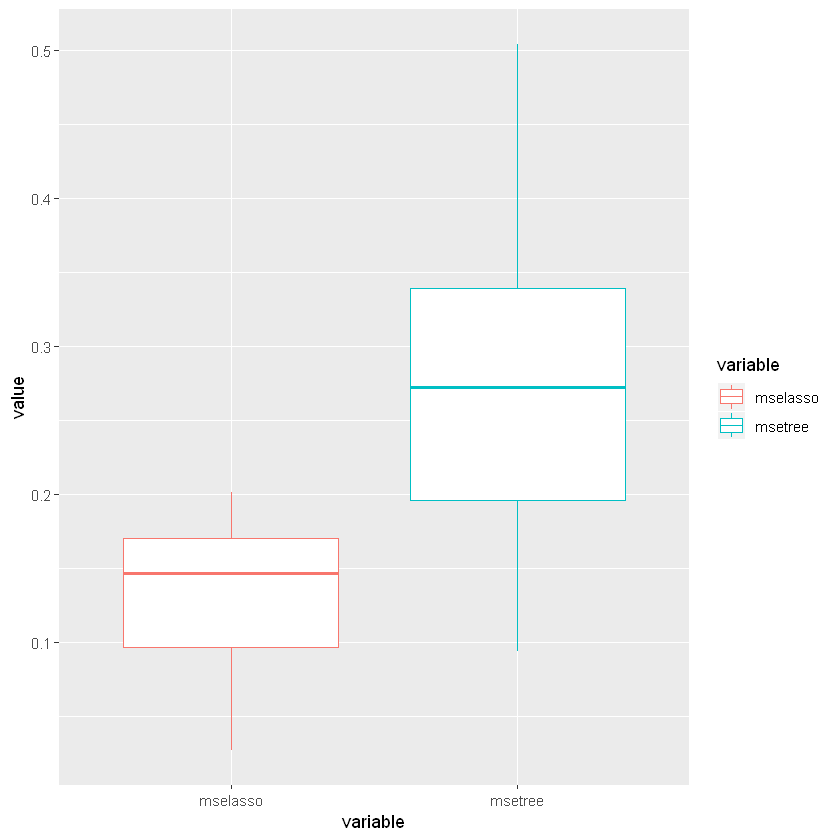

In [9]:
treemse1=as.data.table(t(treemse))
treemse1[,tree:=as.character("tree")]
setnames(treemse1,'V1','msetree')
treemse1=melt(treemse1,id.vars=c('msetree','tree'))


mse_1dlasso1=as.data.table(t(mse_1dlasso))
mse_1dlasso1[,lasso:=as.character("lasso")]
setnames(mse_1dlasso1,'V1','mselasso')
mse_1dlasso1=melt(mse_1dlasso1,id.vars=c('mselasso','lasso'))

MSE=cbind(mse_1dlasso1,treemse1)
 MSE=melt(MSE,id.vars = c('lasso','tree'))
 ggplot(MSE, aes(x=variable, y=value, color=variable)) +
     geom_boxplot() 

## 1-NN Comparison
#### First Raw Data Accuracy

In [10]:

euc_dist=dist(traindatamatrix)
 
 euc_dist=as.matrix(euc_dist)
large_number=1000
diag(euc_dist)=large_number
neighborhood=order(euc_dist[1,]) 
neighborhood
neighbor=neighborhood[1] 
prediction=trainclass[neighbor]
neighborhood=apply(euc_dist,1,order) 


predicted=trainclass[neighborhood[1,]]

table(trainclass,predicted)

acc=sum(trainclass==predicted)/length(predicted)
print(acc)

[1] 25 10 30 16  7 11 23  3  2 29 12 27 26 28 19  9 14 13  6 24  4 20 22  8 18
[26] 15 17  5 21  1

          predicted
trainclass  1  2  3
         1  8  0  2
         2  1 11  0
         3  2  0  6

[1] 0.8333333


In [13]:
lassoNNfunc=function(x){
     seri_id=unique(x[1,1])
     y=x$value
     y=as.matrix(y)
     a=trendfilter(y,ord = 0)
     b=cv.trendfilter(a,k=10,mode = "lambda")
     c=predict.genlasso(a,lambda = b$lambda.min)
     d=as.data.table(c$fit)
     
     return(d)
 }

lassoNN=lapply(series_id,function(x) lassoNNfunc(traindatalong[id==x]))
lassoNN=as.data.table(lassoNN)
lassoNN=as.matrix(lassoNN)
lassoNN=t(lassoNN)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 

#### 1dlasso 1-NN Accuracy

In [14]:
euc_dist=dist(lassoNN)

 euc_dist=as.matrix(euc_dist)
 large_number=1000
 diag(euc_dist)=large_number
 
 neighborhood=order(euc_dist[1,]) 
 neighborhood

 neighbor=neighborhood[1] 
 prediction=trainclass[neighbor]
 neighborhood=apply(euc_dist,1,order) 
 predicted=trainclass[neighborhood[1,]]
 
 table(trainclass,predicted)

 
 acc=sum(trainclass==predicted)/length(predicted)
 print(acc)

[1] 25 16 10  7 30 11 29 23 12 27  2  3 28 26 14  6  9 19 13 24  4  8 20 22 18
[26] 15  5 17 21  1

          predicted
trainclass  1  2  3
         1  8  0  2
         2  0 12  0
         3  0  0  8

[1] 0.9333333


#### Tree 1-NN Accuracy

In [15]:
treeNNfunc=function(i){
    selected_dt=traindatalong[id==i]
    
tree_fit=rpart(value~time,selected_dt,control=rpart.control(cp=0,maxdepth=treedepth[[i]],minsplit=50,minbucket=20))
    
    a=predict(tree_fit,selected_dt)
a=as.data.frame(a)
   return(a)
}


treeNN=lapply(series_id,function(x) treeNNfunc(x))
treeNN=as.data.table(treeNN)
treeNN=as.matrix(treeNN)
treeNN=t(treeNN)


euc_dist=dist(treeNN)
euc_dist=as.matrix(euc_dist)

large_number=1000
diag(euc_dist)=large_number
 
 neighborhood=order(euc_dist[1,]) 
 neighborhood
 
neighbor=neighborhood[1] 
prediction=trainclass[neighbor]
neighborhood=apply(euc_dist,1,order) 
 
predicted=trainclass[neighborhood[1,]]
 
table(trainclass,predicted)

 
 
acc=sum(trainclass==predicted)/length(predicted)
 print(acc)

[1] 16 25 10  7 29 30 26  2 14 28 23 11  3 12 19  9 27 13  4  8  6 20 24 22 15
[26] 18 17  5 21  1

          predicted
trainclass  1  2  3
         1  8  0  2
         2  0 11  1
         3  2  0  6

[1] 0.8333333


#### 1dlasso representation is highly dominating comparing with other methods. Tree representation has same accuracy with Raw data. I think it is because of my max depth settings. I might cut some max depths earlier to prevent overfitting.
#### Other than that, in MSE comparison part we can easily see that 1dlasso values are really lower than Tree values, in terms of median, standart deviation and outliers. The one can see that 1dlasso can be better choice for this data, before accuracy testing.